In [8]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.tools import diff
from scipy.stats import boxcox
from scipy.special import inv_boxcox
from statsmodels.tsa.api import VAR

#### S&P500 Market Data process

In [9]:
sp500_data = pd.read_csv('S&P500.csv')

In [10]:
sp500_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2517 non-null   object 
 1   Open       2517 non-null   float64
 2   High       2517 non-null   float64
 3   Low        2517 non-null   float64
 4   Close      2517 non-null   float64
 5   Adj Close  2517 non-null   float64
 6   Volume     2517 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 137.8+ KB


In [11]:
sp500_data.head()

Date         Open         High          Low        Close  \
0  01-10-2010  1143.489990  1150.300049  1139.420044  1146.239990   
1  04-10-2010  1144.959961  1148.160034  1131.869995  1137.030029   
2  05-10-2010  1140.680054  1162.760010  1140.680054  1160.750000   
3  06-10-2010  1159.810059  1162.329956  1154.849976  1159.969971   
4  07-10-2010  1161.569946  1163.869995  1151.410034  1158.060059   

     Adj Close      Volume  
0  1146.239990  4298910000  
1  1137.030029  3604110000  
2  1160.750000  4068840000  
3  1159.969971  4073160000  
4  1158.060059  3910550000

In [12]:
sp500_data['Date'] = pd.to_datetime(sp500_data['Date'], format='%d-%m-%Y')

In [13]:
sp500_data['Date'] = sp500_data['Date'].dt.strftime('%d-%m-%Y')

In [14]:
sp500_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2517 non-null   object 
 1   Open       2517 non-null   float64
 2   High       2517 non-null   float64
 3   Low        2517 non-null   float64
 4   Close      2517 non-null   float64
 5   Adj Close  2517 non-null   float64
 6   Volume     2517 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 137.8+ KB


In [15]:
sp500_data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [16]:
sp500_data.head()

Date         Open         High          Low        Close  \
0  01-10-2010  1143.489990  1150.300049  1139.420044  1146.239990   
1  04-10-2010  1144.959961  1148.160034  1131.869995  1137.030029   
2  05-10-2010  1140.680054  1162.760010  1140.680054  1160.750000   
3  06-10-2010  1159.810059  1162.329956  1154.849976  1159.969971   
4  07-10-2010  1161.569946  1163.869995  1151.410034  1158.060059   

     Adj Close      Volume  
0  1146.239990  4298910000  
1  1137.030029  3604110000  
2  1160.750000  4068840000  
3  1159.969971  4073160000  
4  1158.060059  3910550000

#### Aviation - American Airlines Group Inc data analysis

In [17]:
AAL_data = pd.read_csv('Aviation/AAL.csv')

In [18]:
AAL_data['Date'] = pd.to_datetime(AAL_data['Date'],format='%d-%m-%Y')

In [19]:
AAL_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2517 non-null   datetime64[ns]
 1   Open       2517 non-null   float64       
 2   High       2517 non-null   float64       
 3   Low        2517 non-null   float64       
 4   Close      2517 non-null   float64       
 5   Adj Close  2517 non-null   float64       
 6   Volume     2517 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 137.8 KB


In [20]:
AAL_data['Date'] = AAL_data['Date'].dt.strftime('%d-%m-%Y')

In [21]:
AAL_data.head()

Date  Open  High   Low  Close  Adj Close   Volume
0  01-10-2010  9.29  9.39  9.21   9.29   8.758067  3603800
1  04-10-2010  9.24  9.48  9.05   9.12   8.597802  3856800
2  05-10-2010  9.27  9.35  9.15   9.23   8.701504  3896600
3  06-10-2010  9.27  9.40  9.15   9.23   8.701504  3230200
4  07-10-2010  9.30  9.31  9.07   9.24   8.710930  3877700

In [22]:
AAL_data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

#### Aviation - Alaska Air Group Inc data process

In [23]:
ALK_data = pd.read_csv('Aviation/ALK.csv')

In [24]:
ALK_data['Date'] = pd.to_datetime(ALK_data['Date'],format='%d-%m-%Y')

In [25]:
ALK_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2524 entries, 0 to 2523
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2517 non-null   datetime64[ns]
 1   Open       2517 non-null   float64       
 2   High       2517 non-null   float64       
 3   Low        2517 non-null   float64       
 4   Close      2517 non-null   float64       
 5   Adj Close  2517 non-null   float64       
 6   Volume     2517 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 138.2 KB


In [26]:
ALK_data['Date'] = ALK_data['Date'].dt.strftime('%d-%m-%Y')

In [27]:
ALK_data.head()

Date     Open     High      Low    Close  Adj Close     Volume
0  01-10-2010  12.9325  12.9625  12.3675  12.4475  10.972344  1663600.0
1  04-10-2010  12.4300  12.5900  11.9975  12.1425  10.703489  1512400.0
2  05-10-2010  12.2600  12.2850  11.9450  12.2150  10.767396  2567200.0
3  06-10-2010  12.2200  12.3950  12.0875  12.1875  10.743157  1043600.0
4  07-10-2010  12.2775  12.3450  11.2150  11.6250  10.247319  7682400.0

In [28]:
ALK_data.isnull().sum()

Date         7
Open         7
High         7
Low          7
Close        7
Adj Close    7
Volume       7
dtype: int64

In [29]:
ALK_data.dropna(inplace=True)

In [30]:
ALK_data['Volume'].describe()

count    2.517000e+03
mean     1.648085e+06
std      1.095121e+06
min      2.706000e+05
25%      1.087600e+06
50%      1.399400e+06
75%      1.880800e+06
max      2.734710e+07
Name: Volume, dtype: float64

In [31]:
ALK_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2517 entries, 0 to 2516
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2517 non-null   object 
 1   Open       2517 non-null   float64
 2   High       2517 non-null   float64
 3   Low        2517 non-null   float64
 4   Close      2517 non-null   float64
 5   Adj Close  2517 non-null   float64
 6   Volume     2517 non-null   float64
dtypes: float64(6), object(1)
memory usage: 157.3+ KB


#### Aviation - Hawaiian Holdings Inc data process

In [32]:
HA_data = pd.read_csv('Aviation/HA.csv')

In [33]:
HA_data['Date'] = pd.to_datetime(HA_data['Date'], format='%d-%m-%Y')

In [34]:
HA_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2524 entries, 0 to 2523
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2517 non-null   datetime64[ns]
 1   Open       2517 non-null   float64       
 2   High       2517 non-null   float64       
 3   Low        2517 non-null   float64       
 4   Close      2517 non-null   float64       
 5   Adj Close  2517 non-null   float64       
 6   Volume     2517 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 138.2 KB


In [35]:
HA_data['Date'] = HA_data['Date'].dt.strftime('%d-%m-%Y')

In [36]:
HA_data.head()

Date  Open  High   Low  Close  Adj Close     Volume
0  01-10-2010  6.02  6.05  5.88   5.96   5.742526   645400.0
1  04-10-2010  5.96  6.00  5.73   5.75   5.540189   618900.0
2  05-10-2010  5.82  5.93  5.77   5.85   5.636539   534800.0
3  06-10-2010  5.85  6.05  5.85   5.97   5.752162  2563900.0
4  07-10-2010  6.04  6.32  5.98   6.15   5.925593  1115200.0

In [37]:
HA_data.isnull().sum()

Date         7
Open         7
High         7
Low          7
Close        7
Adj Close    7
Volume       7
dtype: int64

In [38]:
HA_data.dropna(inplace=True)

#### Finance - Credit Suisse data process

In [39]:
CS_data = pd.read_csv('Finance/CS.csv')

In [40]:
CS_data['Date'] = pd.to_datetime(CS_data['Date'], format='%d-%m-%Y')

In [41]:
CS_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2712 entries, 0 to 2711
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2705 non-null   datetime64[ns]
 1   Open       2705 non-null   float64       
 2   High       2705 non-null   float64       
 3   Low        2705 non-null   float64       
 4   Close      2705 non-null   float64       
 5   Adj Close  2705 non-null   float64       
 6   Volume     2705 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 148.4 KB


In [42]:
CS_data['Date'] = CS_data['Date'].dt.strftime('%d-%m-%Y')

In [43]:
CS_data.head()

Date       Open       High        Low      Close  Adj Close    Volume
0  04-01-2010  49.902344  51.035156  49.765625  50.771484  34.852165  734200.0
1  05-01-2010  51.250000  51.318359  50.644531  51.191406  35.140423  447700.0
2  06-01-2010  50.224609  50.917969  49.951172  50.478516  34.651054  751200.0
3  07-01-2010  51.250000  52.646484  51.201172  52.519531  36.052116  833700.0
4  08-01-2010  52.548828  53.339844  52.441406  53.291016  36.581703  706900.0

In [44]:
CS_data.isnull().sum()

Date         7
Open         7
High         7
Low          7
Close        7
Adj Close    7
Volume       7
dtype: int64

In [45]:
CS_data.dropna(inplace=True)

#### Finance - Deutsche Bank data process

In [46]:
DB_data = pd.read_csv('Finance/DB.csv')

In [47]:
DB_data['Date'] = pd.to_datetime(DB_data['Date'], format='%d-%m-%Y')

In [48]:
DB_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2712 entries, 0 to 2711
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2705 non-null   datetime64[ns]
 1   Open       2705 non-null   float64       
 2   High       2705 non-null   float64       
 3   Low        2705 non-null   float64       
 4   Close      2705 non-null   float64       
 5   Adj Close  2705 non-null   float64       
 6   Volume     2705 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 148.4 KB


In [49]:
DB_data['Date'] = DB_data['Date'].dt.strftime('%d-%m-%Y')

In [50]:
DB_data.head()

Date       Open       High        Low      Close  Adj Close    Volume
0  04-01-2010  69.103050  70.162216  68.893127  69.875954  59.037861  469500.0
1  05-01-2010  71.412216  71.698471  70.610687  71.211830  60.166534  503300.0
2  06-01-2010  69.847328  70.543892  69.494278  69.980919  59.126545  495000.0
3  07-01-2010  70.133591  70.896950  69.809158  70.772903  59.795689  700100.0
4  08-01-2010  72.891220  73.416031  72.509544  73.330154  61.956295  763900.0

In [51]:
DB_data.isnull().sum()

Date         7
Open         7
High         7
Low          7
Close        7
Adj Close    7
Volume       7
dtype: int64

In [52]:
DB_data.dropna(inplace=True)

#### Finance - Goldman Sachs data process

In [53]:
GS_data = pd.read_csv('Finance/GS.csv')

In [54]:
GS_data['Date'] = pd.to_datetime(GS_data['Date'], format='%d-%m-%Y')

In [55]:
GS_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2712 entries, 0 to 2711
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2705 non-null   datetime64[ns]
 1   Open       2705 non-null   float64       
 2   High       2705 non-null   float64       
 3   Low        2705 non-null   float64       
 4   Close      2705 non-null   float64       
 5   Adj Close  2705 non-null   float64       
 6   Volume     2705 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 148.4 KB


In [56]:
GS_data['Date'] = GS_data['Date'].dt.strftime('%d-%m-%Y')

In [57]:
GS_data.head()

Date        Open        High         Low       Close   Adj Close  \
0  04-01-2010  170.050003  174.250000  169.509995  173.080002  147.920776   
1  05-01-2010  173.000000  176.259995  172.570007  176.139999  150.535919   
2  06-01-2010  175.380005  175.380005  173.759995  174.259995  148.929138   
3  07-01-2010  174.320007  178.750000  173.949997  177.669998  151.843475   
4  08-01-2010  176.330002  177.429993  173.949997  174.309998  148.971909   

       Volume  
0   9135000.0  
1  11659400.0  
2   7381100.0  
3   8727400.0  
4   7268100.0

In [58]:
GS_data.isnull().sum()

Date         7
Open         7
High         7
Low          7
Close        7
Adj Close    7
Volume       7
dtype: int64

In [59]:
GS_data.dropna(inplace=True)

#### Pharma - Bausch Health Companies inc data process

In [60]:
BHC_data = pd.read_csv('Healthcare_Pharma/BHC.csv')

In [61]:
BHC_data['Date'] = pd.to_datetime(BHC_data['Date'], format='%d-%m-%Y')

In [62]:
BHC_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2525 entries, 0 to 2524
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2517 non-null   datetime64[ns]
 1   Open       2517 non-null   float64       
 2   High       2517 non-null   float64       
 3   Low        2517 non-null   float64       
 4   Close      2517 non-null   float64       
 5   Adj Close  2517 non-null   float64       
 6   Volume     2517 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 138.2 KB


In [63]:
BHC_data['Date'] = BHC_data['Date'].dt.strftime('%d-%m-%Y')

In [64]:
BHC_data.head()

Date       Open       High        Low      Close  Adj Close  \
0  01-10-2010  25.120001  25.879999  25.100000  25.750000  24.757708   
1  04-10-2010  25.750000  25.990000  25.590000  25.870001  24.873083   
2  05-10-2010  26.040001  26.330000  25.830000  26.299999  25.286512   
3  06-10-2010  26.150000  26.879999  26.049999  26.690001  25.661484   
4  07-10-2010  26.700001  26.910000  26.440001  26.600000  25.574951   

      Volume  
0  5778700.0  
1  4187200.0  
2  4610300.0  
3  4448900.0  
4  2453900.0

In [65]:
BHC_data.isnull().sum()

Date         8
Open         8
High         8
Low          8
Close        8
Adj Close    8
Volume       8
dtype: int64

In [66]:
BHC_data.dropna(inplace=True)

#### Healthcare - Johnson & Johnson data process

In [67]:
JNJ_data = pd.read_csv('Healthcare_Pharma/JNJ.csv')

In [68]:
JNJ_data['Date'] = pd.to_datetime(JNJ_data['Date'], format='%d-%m-%Y')

In [69]:
JNJ_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2525 entries, 0 to 2524
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2517 non-null   datetime64[ns]
 1   Open       2517 non-null   float64       
 2   High       2517 non-null   float64       
 3   Low        2517 non-null   float64       
 4   Close      2517 non-null   float64       
 5   Adj Close  2517 non-null   float64       
 6   Volume     2517 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 138.2 KB


In [70]:
JNJ_data['Date'] = JNJ_data['Date'].dt.strftime('%d-%m-%Y')

In [71]:
JNJ_data.head()

Date       Open       High        Low      Close  Adj Close  \
0  01-10-2010  62.090000  62.250000  61.570000  61.750000  45.970119   
1  04-10-2010  61.540001  61.980000  61.299999  61.669998  45.910553   
2  05-10-2010  62.080002  62.939999  62.009998  62.799999  46.751797   
3  06-10-2010  62.889999  63.259998  62.500000  63.209999  47.057022   
4  07-10-2010  63.290001  63.500000  63.000000  63.220001  47.064480   

       Volume  
0   9773200.0  
1   8703600.0  
2  12439400.0  
3  11339800.0  
4   9826600.0

In [72]:
JNJ_data.isnull().sum()

Date         8
Open         8
High         8
Low          8
Close        8
Adj Close    8
Volume       8
dtype: int64

In [73]:
JNJ_data.dropna(inplace=True)

#### Healthcare - Merck and CO inc. data process

In [74]:
MRK_data = pd.read_csv('Healthcare_Pharma/MRK.csv')

In [75]:
MRK_data['Date'] = pd.to_datetime(MRK_data['Date'], format='%d-%m-%Y')

In [76]:
MRK_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2525 entries, 0 to 2524
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2517 non-null   datetime64[ns]
 1   Open       2517 non-null   float64       
 2   High       2517 non-null   float64       
 3   Low        2517 non-null   float64       
 4   Close      2517 non-null   float64       
 5   Adj Close  2517 non-null   float64       
 6   Volume     2517 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 138.2 KB


In [77]:
MRK_data['Date'] = MRK_data['Date'].dt.strftime('%d-%m-%Y')

In [78]:
MRK_data.head()

Date       Open       High        Low      Close  Adj Close  \
0  01-10-2010  36.759998  36.840000  36.349998  36.599998  26.052284   
1  04-10-2010  36.490002  36.750000  36.290001  36.520000  25.995331   
2  05-10-2010  36.860001  37.150002  36.700001  37.020000  26.351234   
3  06-10-2010  37.040001  37.220001  36.820000  37.009998  26.344130   
4  07-10-2010  37.349998  37.389999  36.630001  36.709999  26.130579   

       Volume  
0  11741900.0  
1   9234900.0  
2  10669200.0  
3   7541300.0  
4  13897800.0

In [79]:
MRK_data.isnull().sum()

Date         8
Open         8
High         8
Low          8
Close        8
Adj Close    8
Volume       8
dtype: int64

In [80]:
MRK_data.dropna(inplace=True)

#### Technology - Apple inc data process

In [81]:
AAPL_data = pd.read_csv('Technology/AAPL.csv')

In [82]:
AAPL_data['Date'] = pd.to_datetime(AAPL_data['Date'], format='%d-%m-%Y')

In [83]:
AAPL_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2517 non-null   datetime64[ns]
 1   Open       2517 non-null   float64       
 2   High       2517 non-null   float64       
 3   Low        2517 non-null   float64       
 4   Close      2517 non-null   float64       
 5   Adj Close  2517 non-null   float64       
 6   Volume     2517 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 137.8 KB


In [84]:
AAPL_data['Date'] = AAPL_data['Date'].dt.strftime('%d-%m-%Y')

In [85]:
AAPL_data.head()

Date       Open       High        Low      Close  Adj Close  \
0  01-10-2010  10.219643  10.235000  10.048214  10.090000   8.719163   
1  04-10-2010  10.057143  10.103572   9.920357   9.951428   8.599421   
2  05-10-2010  10.071428  10.337500  10.065000  10.319285   8.917298   
3  06-10-2010  10.342500  10.428214  10.187857  10.328215   8.925013   
4  07-10-2010  10.369286  10.374286  10.246786  10.329286   8.925941   

      Volume  
0  448142800  
1  435302000  
2  501967200  
3  670868800  
4  408399600

In [86]:
AAPL_data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

#### Technology - Amazon inc data process

In [87]:
AMZN_data = pd.read_csv('Technology/AMZN.csv')

In [88]:
AMZN_data['Date'] = pd.to_datetime(AMZN_data['Date'], format='%d-%m-%Y')

In [89]:
AMZN_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2524 entries, 0 to 2523
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2517 non-null   datetime64[ns]
 1   Open       2517 non-null   float64       
 2   High       2517 non-null   float64       
 3   Low        2517 non-null   float64       
 4   Close      2517 non-null   float64       
 5   Adj Close  2517 non-null   float64       
 6   Volume     2517 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 138.2 KB


In [90]:
AMZN_data['Date'] = AMZN_data['Date'].dt.strftime('%d-%m-%Y')

In [91]:
AMZN_data.head()

Date        Open        High         Low       Close   Adj Close  \
0  01-10-2010  157.080002  157.440002  152.199997  153.710007  153.710007   
1  04-10-2010  153.949997  155.960007  152.789993  155.389999  155.389999   
2  05-10-2010  157.080002  161.210007  157.009995  160.869995  160.869995   
3  06-10-2010  160.600006  160.679993  154.600006  155.399994  155.399994   
4  07-10-2010  156.509995  157.399994  153.389999  156.270004  156.270004   

      Volume  
0  8683400.0  
1  5346500.0  
2  5620000.0  
3  6060800.0  
4  4622000.0

In [92]:
AMZN_data.isnull().sum()

Date         7
Open         7
High         7
Low          7
Close        7
Adj Close    7
Volume       7
dtype: int64

In [93]:
AMZN_data.dropna(inplace=True)

#### Technology - Google inc data process

In [94]:
GOOG_data = pd.read_csv('Technology/GOOG.csv')

In [95]:
GOOG_data['Date'] = pd.to_datetime(GOOG_data['Date'], format='%d-%m-%Y')

In [96]:
GOOG_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2524 entries, 0 to 2523
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2517 non-null   datetime64[ns]
 1   Open       2517 non-null   float64       
 2   High       2517 non-null   float64       
 3   Low        2517 non-null   float64       
 4   Close      2517 non-null   float64       
 5   Adj Close  2517 non-null   float64       
 6   Volume     2517 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 138.2 KB


In [97]:
GOOG_data['Date'] = GOOG_data['Date'].dt.strftime('%d-%m-%Y')

In [98]:
GOOG_data.head()

Date        Open        High         Low       Close   Adj Close  \
0  01-10-2010  264.010437  264.319275  260.523499  261.828613  261.828613   
1  04-10-2010  261.494843  263.138702  258.456238  260.199707  260.199707   
2  05-10-2010  263.203461  268.991760  262.291870  268.110046  268.110046   
3  06-10-2010  268.623138  268.966858  263.980530  266.177307  266.177307   
4  07-10-2010  267.103821  267.596985  263.582031  264.015411  264.015411   

      Volume  
0  4466600.0  
1  3895400.0  
2  7040400.0  
3  5545200.0  
4  4809400.0

In [99]:
GOOG_data.isnull().sum()

Date         7
Open         7
High         7
Low          7
Close        7
Adj Close    7
Volume       7
dtype: int64

In [100]:
GOOG_data.dropna(inplace=True)

#### Merging all stocks and Market S&P500 data

In [101]:
all_df = pd.merge(sp500_data[['Date','Close']],AAL_data[['Date','Close']], on='Date', how='outer')

In [102]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2517 entries, 0 to 2516
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2517 non-null   object 
 1   Close_x  2517 non-null   float64
 2   Close_y  2517 non-null   float64
dtypes: float64(2), object(1)
memory usage: 78.7+ KB


In [103]:
# dfs = [ALK_data,HA_data,CS_data,DB_data,GS_data,BHC_data,JNJ_data]
dfs = [ALK_data,HA_data,CS_data,DB_data,GS_data,BHC_data,JNJ_data,MRK_data,AAPL_data,AMZN_data,GOOG_data]

In [104]:
for i in range(len(dfs)):
    all_df = pd.merge(all_df, dfs[i][['Date', 'Close']], on='Date', how='outer')

In [105]:
Close_names = ['sp500_close','AAL_close','ALK_close','HA_close','CS_close','DB_close','GS_close','BHC_close','JNJ_close','MRK_close','AAPL_close','AMZN_close','GOOG_close']

In [106]:
all_df.columns = ['Date'] + Close_names

In [107]:
industry_names = ['Date','sp500_close','Aviation', 'Aviation','Aviation','Finance','Finance','Finance','Healthcare/Pharma','Healthcare/Pharma','Healthcare/Pharma','Technology','Technology','Technology']

# Create a MultiIndex for columns
columns = pd.MultiIndex.from_tuples([(industry, stock) for industry, stock in zip(industry_names, all_df.columns[:])],
                                    names=['Industry', 'Stock'])

# Set the MultiIndex columns to the DataFrame
all_df.columns = columns

In [108]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2705 entries, 0 to 2704
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   (Date, Date)                    2705 non-null   object 
 1   (sp500_close, sp500_close)      2517 non-null   float64
 2   (Aviation, AAL_close)           2517 non-null   float64
 3   (Aviation, ALK_close)           2517 non-null   float64
 4   (Aviation, HA_close)            2517 non-null   float64
 5   (Finance, CS_close)             2705 non-null   float64
 6   (Finance, DB_close)             2705 non-null   float64
 7   (Finance, GS_close)             2705 non-null   float64
 8   (Healthcare/Pharma, BHC_close)  2517 non-null   float64
 9   (Healthcare/Pharma, JNJ_close)  2517 non-null   float64
 10  (Healthcare/Pharma, MRK_close)  2517 non-null   float64
 11  (Technology, AAPL_close)        2517 non-null   float64
 12  (Technology, AMZN_close)        25

In [109]:
all_df.head()

Industry        Date  sp500_close  Aviation                       Finance  \
Stock           Date  sp500_close AAL_close ALK_close HA_close   CS_close   
0         01-10-2010  1146.239990      9.29   12.4475     5.96  42.226563   
1         04-10-2010  1137.030029      9.12   12.1425     5.75  41.914063   
2         05-10-2010  1160.750000      9.23   12.2150     5.85  43.154297   
3         06-10-2010  1159.969971      9.23   12.1875     5.97  43.437500   
4         07-10-2010  1158.060059      9.24   11.6250     6.15  43.671875   

Industry                        Healthcare/Pharma                        \
Stock      DB_close    GS_close         BHC_close  JNJ_close  MRK_close   
0         52.595421  147.699997         25.750000  61.750000  36.599998   
1         51.755726  146.570007         25.870001  61.669998  36.520000   
2         53.950382  149.570007         26.299999  62.799999  37.020000   
3         54.608780  150.839996         26.690001  63.209999  37.009998   
4         54.036259  151.110001         26.600000  63.220001  36.709999   

Industry Technology                          
Stock    AAPL_close  AMZN_close  GOOG_close  
0         10.090000  153.710007  261.828613  
1          9.951428  155.389999  260.199707  
2         10.319285  160.869995  268.110046  
3         10.328215  155.399994  266.177307  
4         10.329286  156.270004  264.015411

In [110]:
all_df.isnull().sum()

Industry           Stock      
Date               Date             0
sp500_close        sp500_close    188
Aviation           AAL_close      188
                   ALK_close      188
                   HA_close       188
Finance            CS_close         0
                   DB_close         0
                   GS_close         0
Healthcare/Pharma  BHC_close      188
                   JNJ_close      188
                   MRK_close      188
Technology         AAPL_close     188
                   AMZN_close     188
                   GOOG_close     188
dtype: int64

In [111]:
all_df.dropna(inplace=True)

In [112]:
all_df.describe()

Industry  sp500_close     Aviation                                Finance  \
Stock     sp500_close    AAL_close    ALK_close     HA_close     CS_close   
count     2517.000000  2517.000000  2517.000000  2517.000000  2517.000000   
mean      2111.392732    29.397636    50.031176    22.870413    21.501379   
std        612.227235    15.211889    24.187020    15.483034     8.988043   
min       1099.229980     4.000000    11.620000     3.780000     6.670000   
25%       1562.170044    13.010000    26.780001     7.030000    13.740000   
50%       2071.219971    32.520000    58.540001    21.910000    19.639999   
75%       2656.300049    42.200001    67.260002    36.900002    27.750000   
max       3580.840088    58.470001   100.239998    60.299999    46.513672   

Industry                           Healthcare/Pharma               \
Stock        DB_close     GS_close         BHC_close    JNJ_close   
count     2517.000000  2517.000000       2517.000000  2517.000000   
mean        27.304930   179.598184         61.880687   105.277378   
std         15.409974    42.405475         57.170002    28.174233   
min          5.480000    87.699997          8.510000    57.660000   
25%         13.470000   154.990005         22.170000    81.930000   
50%         28.370001   177.229996         38.759998   104.040001   
75%         41.049618   211.580002         90.269997   130.979996   
max         62.624046   273.380005        262.519989   155.509995   

Industry                Technology                            
Stock       MRK_close   AAPL_close   AMZN_close   GOOG_close  
count     2517.000000  2517.000000  2517.000000  2517.000000  
mean        57.161053    33.454670   854.636107   730.426139  
std         15.164505    20.630118   745.201139   364.685720  
min         29.809999     9.951428   153.029999   236.553345  
25%         45.730000    18.961428   266.489990   403.642059  
50%         57.180000    27.592501   533.750000   651.789978  
75%         64.089996    42.962502  1500.000000  1055.810059  
max         92.040001   134.179993  3531.449951  1728.280029

### Trend analysis of all stocks

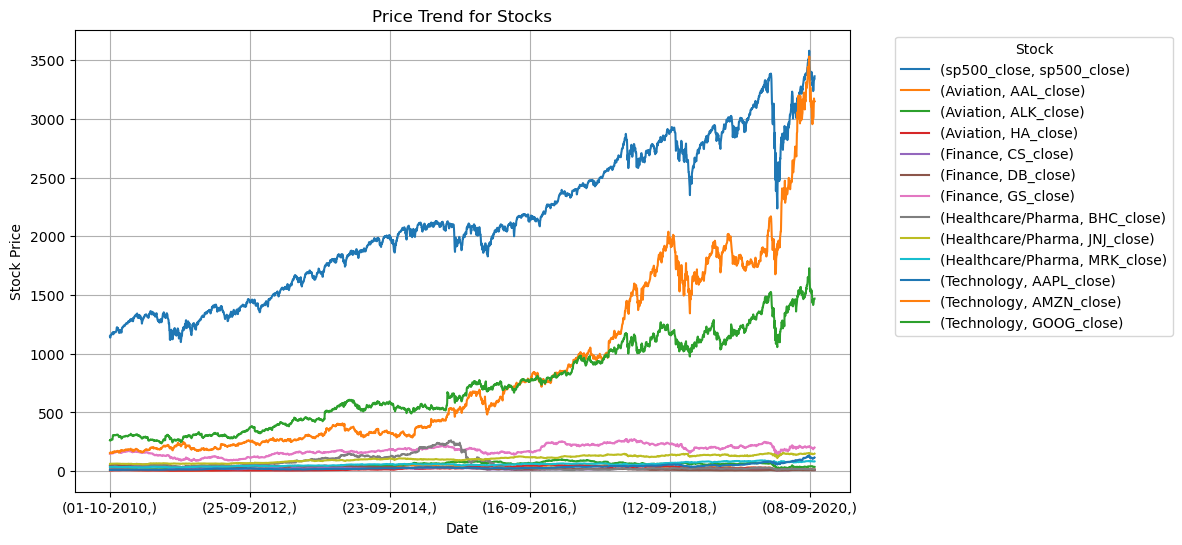

In [113]:
ax = all_df.set_index('Date').plot(kind='line', figsize=(10, 6))

# Customize the plot
plt.title('Price Trend for Stocks')
plt.xlabel('Date')
plt.ylabel('Stock Price')

# Move the legend outside the box
ax.legend(title='Stock', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True)
plt.show()

In [114]:
all_df.head()

Industry        Date  sp500_close  Aviation                       Finance  \
Stock           Date  sp500_close AAL_close ALK_close HA_close   CS_close   
0         01-10-2010  1146.239990      9.29   12.4475     5.96  42.226563   
1         04-10-2010  1137.030029      9.12   12.1425     5.75  41.914063   
2         05-10-2010  1160.750000      9.23   12.2150     5.85  43.154297   
3         06-10-2010  1159.969971      9.23   12.1875     5.97  43.437500   
4         07-10-2010  1158.060059      9.24   11.6250     6.15  43.671875   

Industry                        Healthcare/Pharma                        \
Stock      DB_close    GS_close         BHC_close  JNJ_close  MRK_close   
0         52.595421  147.699997         25.750000  61.750000  36.599998   
1         51.755726  146.570007         25.870001  61.669998  36.520000   
2         53.950382  149.570007         26.299999  62.799999  37.020000   
3         54.608780  150.839996         26.690001  63.209999  37.009998   
4         54.036259  151.110001         26.600000  63.220001  36.709999   

Industry Technology                          
Stock    AAPL_close  AMZN_close  GOOG_close  
0         10.090000  153.710007  261.828613  
1          9.951428  155.389999  260.199707  
2         10.319285  160.869995  268.110046  
3         10.328215  155.399994  266.177307  
4         10.329286  156.270004  264.015411

In [115]:
all_stock_norm = all_df.copy()

In [116]:
industry = ['sp500_close','Aviation','Finance','Healthcare/Pharma','Technology']

### Normalized Trend analysis of all stocks

In [117]:
# Normalizing the values of stocks for trend analysis
for ind in industry:
    stocks = all_stock_norm[industry].columns.levels[1]
    for stock in stocks:
        if stock != 'Date' and stock in all_stock_norm[ind].columns:
            all_stock_norm[(ind, stock)] = all_stock_norm[ind, stock]/all_stock_norm[ind, stock][0]

In [118]:
all_stock_norm.head()

Industry        Date sp500_close  Aviation                       Finance  \
Stock           Date sp500_close AAL_close ALK_close  HA_close  CS_close   
0         01-10-2010    1.000000  1.000000  1.000000  1.000000  1.000000   
1         04-10-2010    0.991965  0.981701  0.975497  0.964765  0.992599   
2         05-10-2010    1.012659  0.993541  0.981322  0.981544  1.021970   
3         06-10-2010    1.011978  0.993541  0.979112  1.001678  1.028677   
4         07-10-2010    1.010312  0.994618  0.933922  1.031879  1.034228   

Industry                     Healthcare/Pharma                     Technology  \
Stock     DB_close  GS_close         BHC_close JNJ_close MRK_close AAPL_close   
0         1.000000  1.000000          1.000000  1.000000  1.000000   1.000000   
1         0.984035  0.992349          1.004660  0.998704  0.997814   0.986266   
2         1.025762  1.012661          1.021359  1.017004  1.011475   1.022724   
3         1.038280  1.021259          1.036505  1.023644  1.011202   1.023609   
4         1.027395  1.023087          1.033010  1.023806  1.003005   1.023715   

Industry                        
Stock    AMZN_close GOOG_close  
0          1.000000   1.000000  
1          1.010930   0.993779  
2          1.046581   1.023991  
3          1.010995   1.016609  
4          1.016655   1.008352

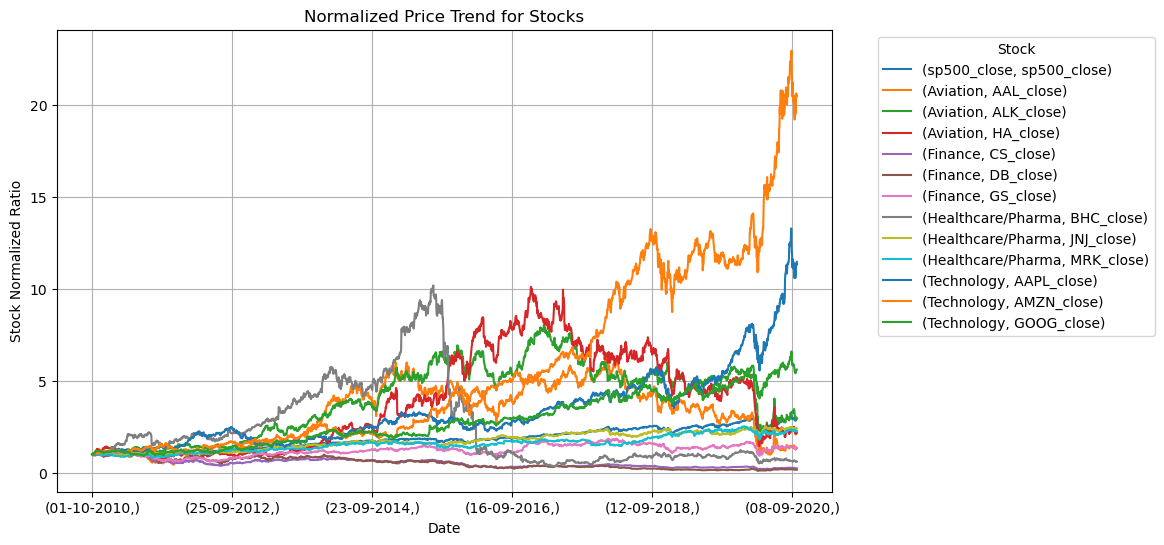

In [119]:
ax = all_stock_norm.set_index('Date').plot(kind='line', figsize=(10, 6))

# Customize the plot
plt.title('Normalized Price Trend for Stocks')
plt.xlabel('Date')
plt.ylabel('Stock Normalized Ratio')

# Move the legend outside the box
ax.legend(title='Stock', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True)
plt.show()

### Normalized Trend analysis for each industry vs Market Index

In [120]:
all_stock_norm = all_stock_norm.set_index('Date')

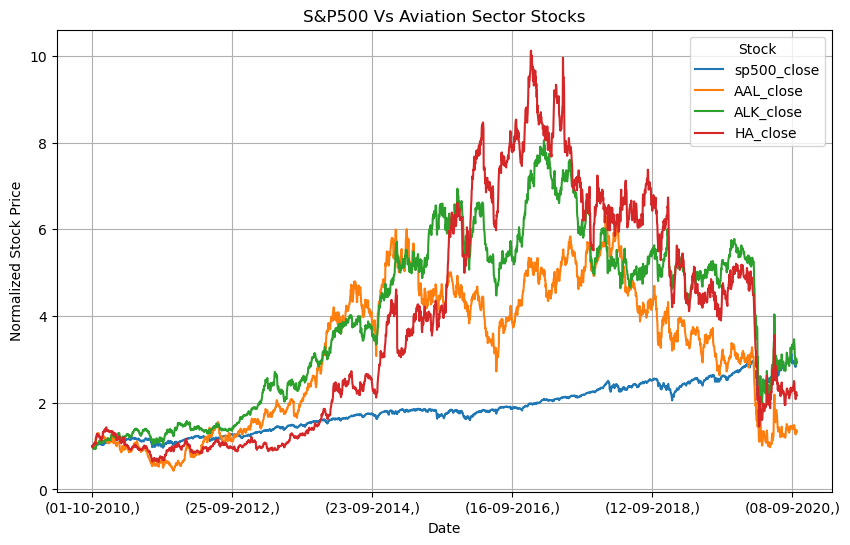

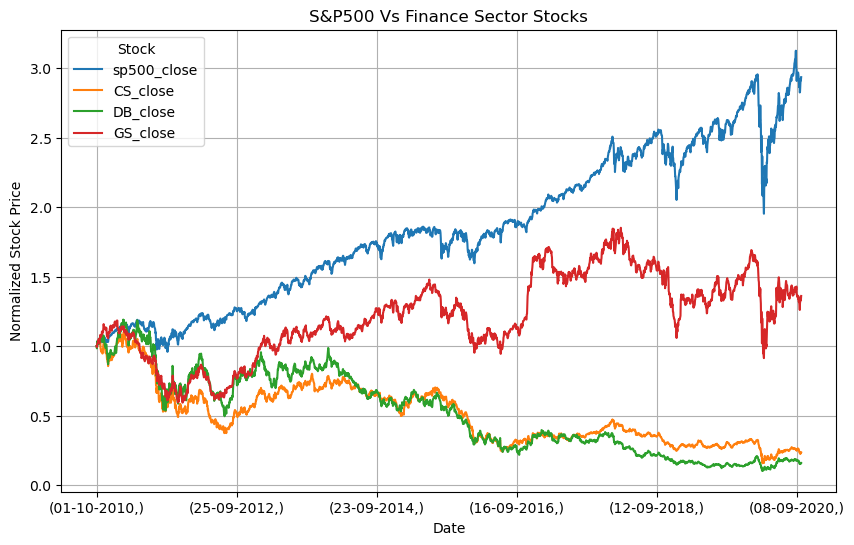

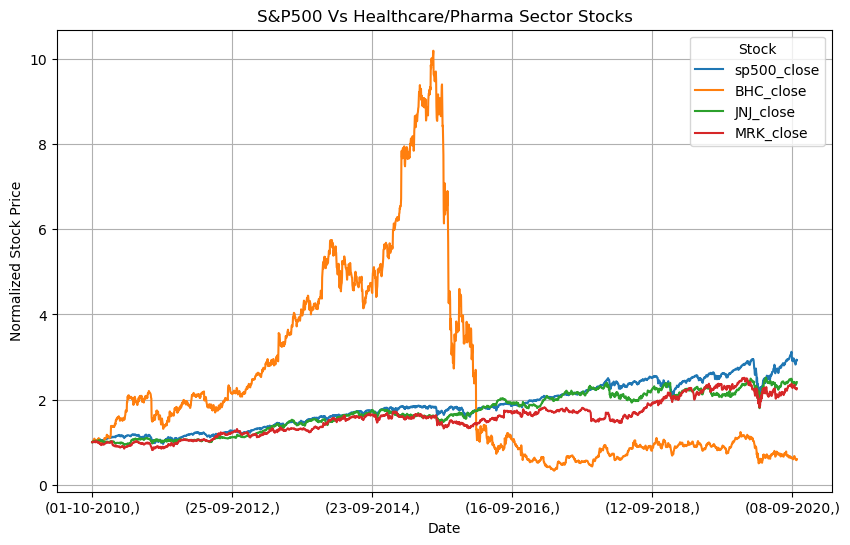

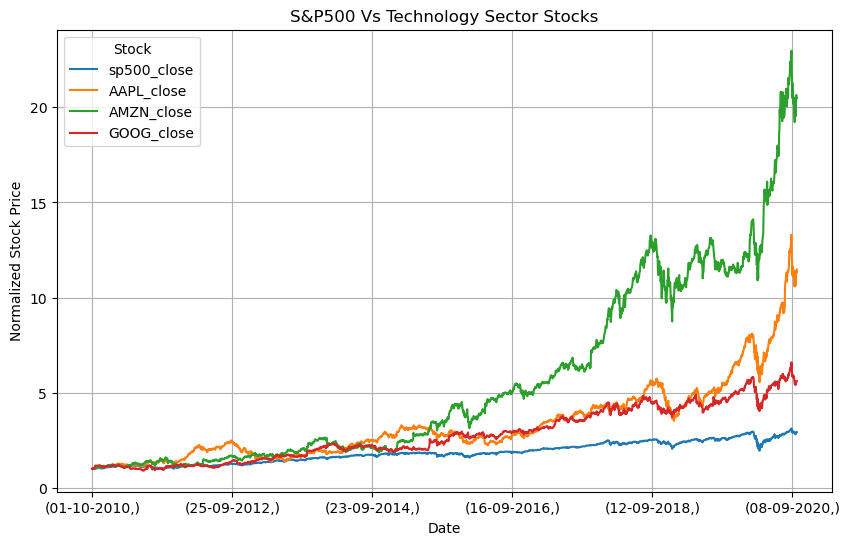

In [121]:
for ind in industry:
    stocks_industry = all_stock_norm[['sp500_close',ind]].columns.get_level_values('Stock')
    df_industry = all_stock_norm[['sp500_close',ind]]
    df_industry = df_industry.droplevel(level=0, axis=1)
    if df_industry.columns[1] != 'sp500_close':
        df_industry[stocks_industry].plot(kind='line', figsize=(10, 6))

        # Customize the plot
        plt.title(f'S&P500 Vs {ind} Sector Stocks')
        plt.xlabel('Date')
        plt.ylabel('Normalized Stock Price')
        plt.legend(title='Stock')
        plt.grid(True)
        plt.show()

#### Daily return analysis 

In [122]:
all_df.set_index('Date', inplace=True)

In [123]:
returns = all_df.pct_change()

In [124]:
returns.head()

Industry      sp500_close  Aviation                       Finance            \
Stock         sp500_close AAL_close ALK_close  HA_close  CS_close  DB_close   
Date                                                                          
(01-10-2010,)         NaN       NaN       NaN       NaN       NaN       NaN   
(04-10-2010,)   -0.008035 -0.018299 -0.024503 -0.035235 -0.007401 -0.015965   
(05-10-2010,)    0.020861  0.012061  0.005971  0.017391  0.029590  0.042404   
(06-10-2010,)   -0.000672  0.000000 -0.002251  0.020513  0.006563  0.012204   
(07-10-2010,)   -0.001647  0.001083 -0.046154  0.030151  0.005396 -0.010484   

Industry                Healthcare/Pharma                     Technology  \
Stock          GS_close         BHC_close JNJ_close MRK_close AAPL_close   
Date                                                                       
(01-10-2010,)       NaN               NaN       NaN       NaN        NaN   
(04-10-2010,) -0.007651          0.004660 -0.001296 -0.002186  -0.013734   
(05-10-2010,)  0.020468          0.016621  0.018323  0.013691   0.036965   
(06-10-2010,)  0.008491          0.014829  0.006529 -0.000270   0.000865   
(07-10-2010,)  0.001790         -0.003372  0.000158 -0.008106   0.000104   

Industry                             
Stock         AMZN_close GOOG_close  
Date                                 
(01-10-2010,)        NaN        NaN  
(04-10-2010,)   0.010930  -0.006221  
(05-10-2010,)   0.035266   0.030401  
(06-10-2010,)  -0.034003  -0.007209  
(07-10-2010,)   0.005599  -0.008122

In [125]:
returns.dropna(inplace=True)

### Daily returns Vs Market Index return ANalysis

In [126]:
all_stock_one = returns.droplevel(level=0, axis=1)

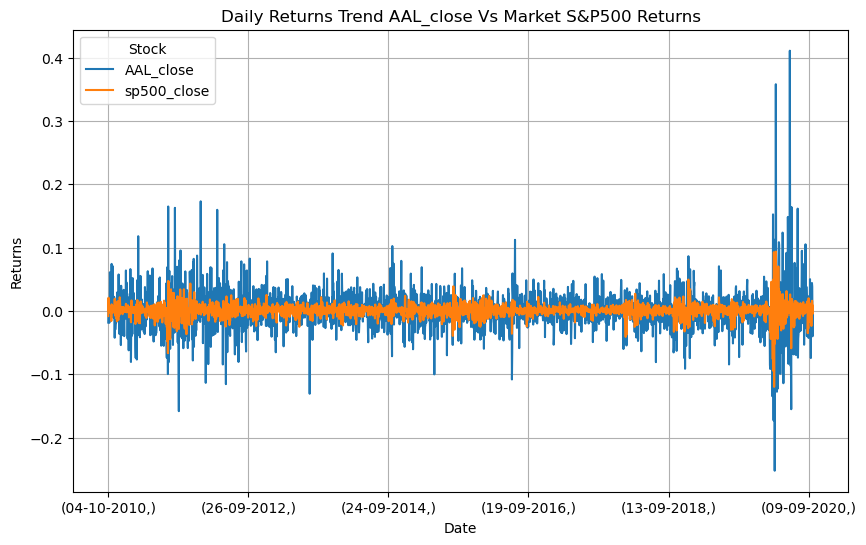

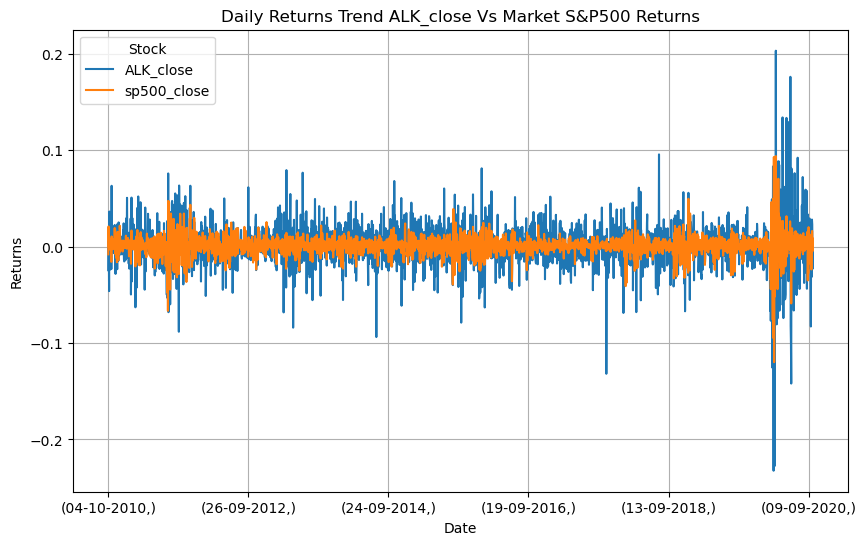

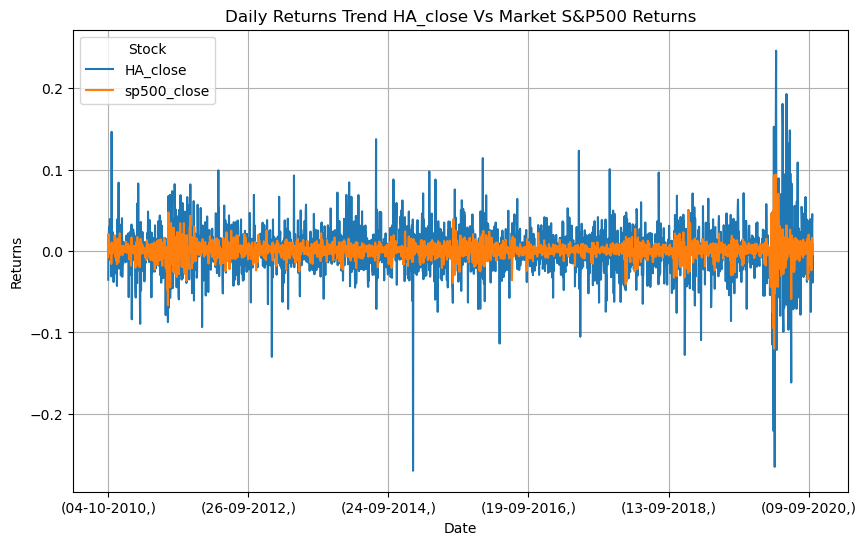

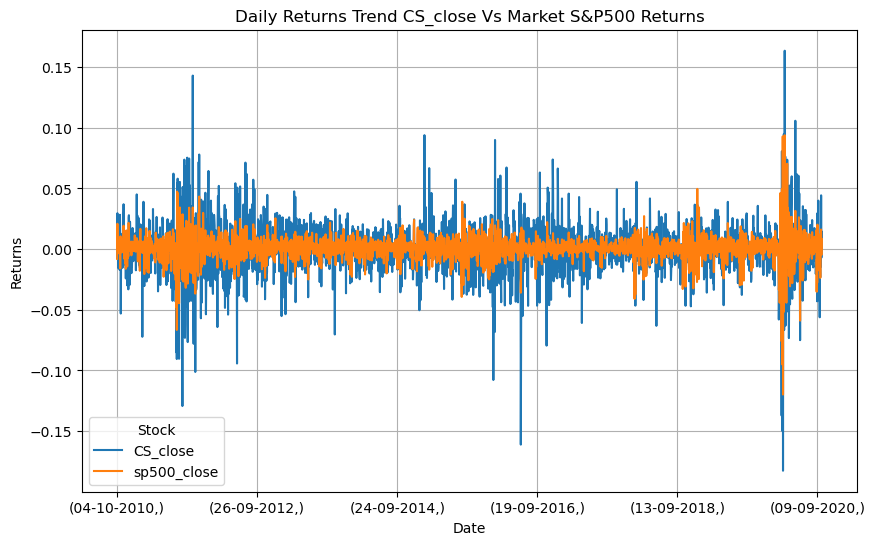

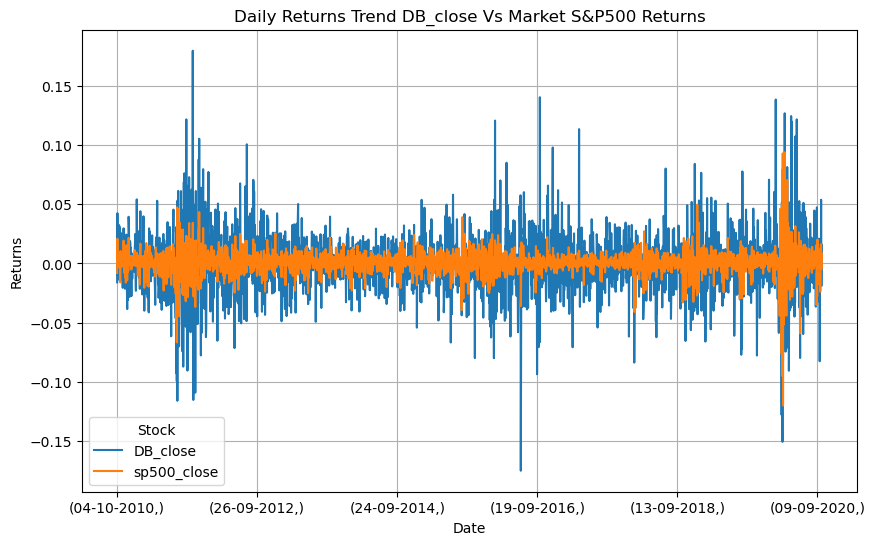

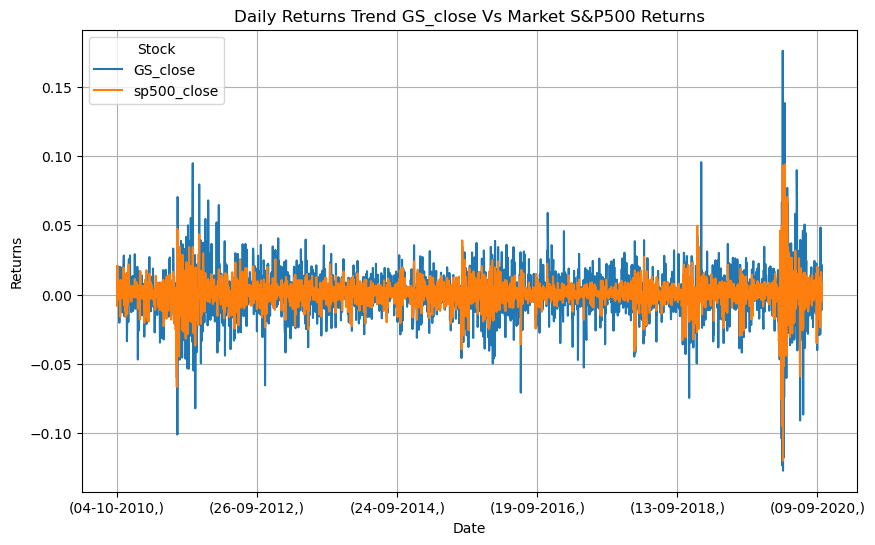

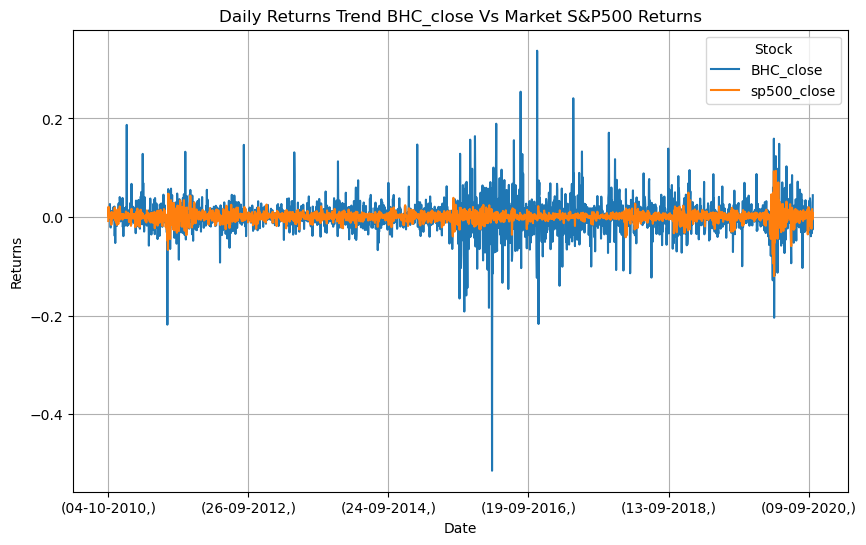

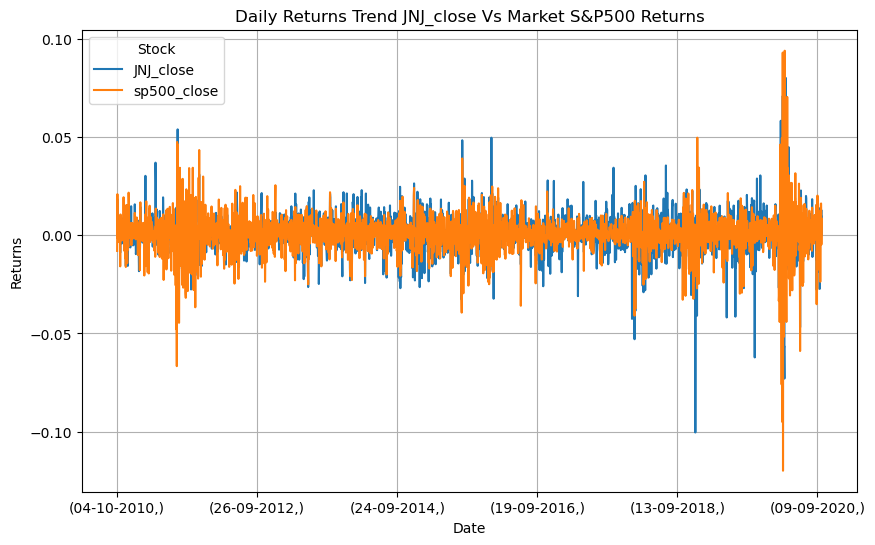

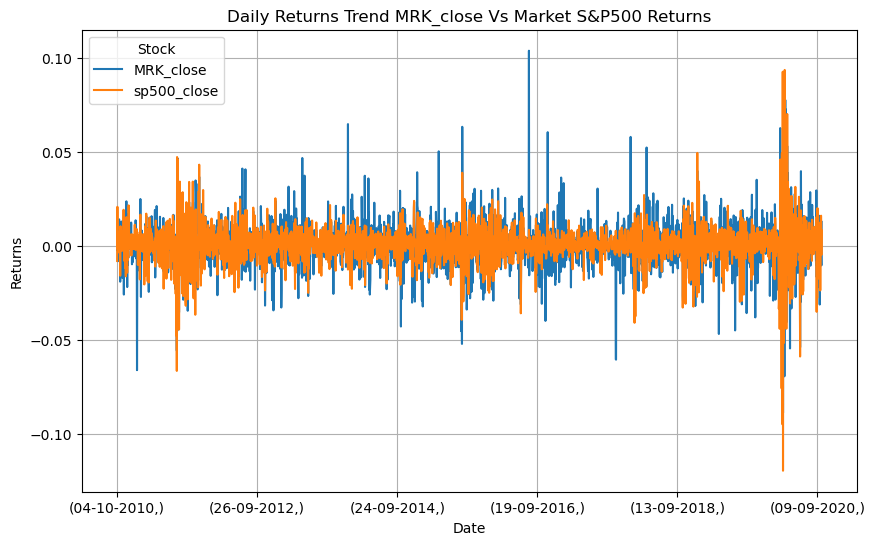

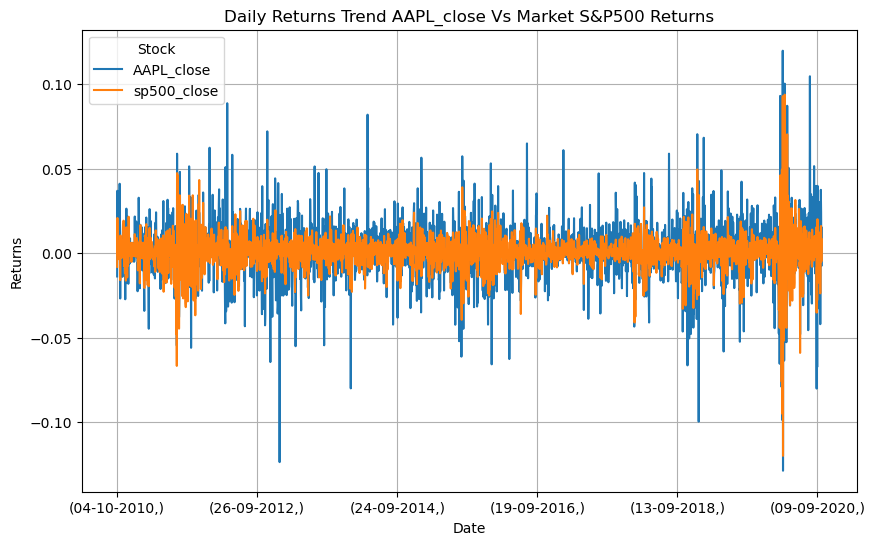

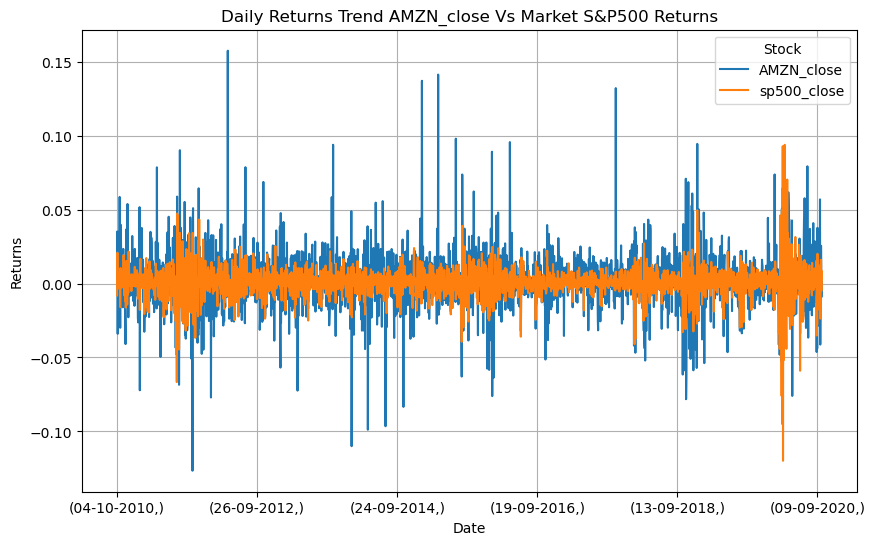

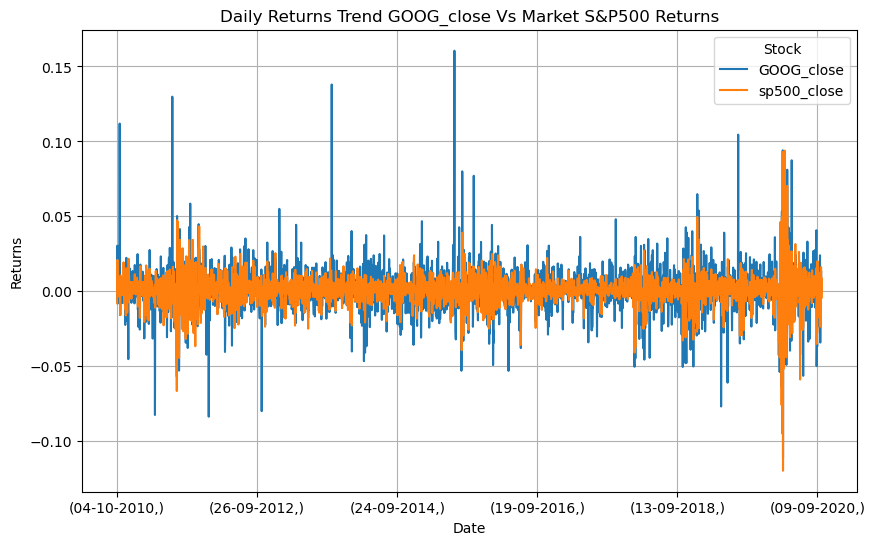

In [127]:
for stock in Close_names[1:]:    
    df_industry = all_stock_one[[stock,'sp500_close']]
    df_industry.plot(kind='line', figsize=(10, 6))

    # Customize the plot
    plt.title(f'Daily Returns Trend {stock} Vs Market S&P500 Returns')
    plt.xlabel('Date')
    plt.ylabel('Returns')
    plt.legend(title='Stock')
    plt.grid(True)
    plt.show()

#### Dispersion from mean analysis

In [128]:
all_stock_one.head()

Stock          sp500_close  AAL_close  ALK_close  HA_close  CS_close  \
Date                                                                   
(04-10-2010,)    -0.008035  -0.018299  -0.024503 -0.035235 -0.007401   
(05-10-2010,)     0.020861   0.012061   0.005971  0.017391  0.029590   
(06-10-2010,)    -0.000672   0.000000  -0.002251  0.020513  0.006563   
(07-10-2010,)    -0.001647   0.001083  -0.046154  0.030151  0.005396   
(08-10-2010,)     0.006122  -0.018398   0.036344  0.000000 -0.015653   

Stock          DB_close  GS_close  BHC_close  JNJ_close  MRK_close  \
Date                                                                 
(04-10-2010,) -0.015965 -0.007651   0.004660  -0.001296  -0.002186   
(05-10-2010,)  0.042404  0.020468   0.016621   0.018323   0.013691   
(06-10-2010,)  0.012204  0.008491   0.014829   0.006529  -0.000270   
(07-10-2010,) -0.010484  0.001790  -0.003372   0.000158  -0.008106   
(08-10-2010,) -0.003002  0.010257   0.009023   0.000158   0.005448   

Stock          AAPL_close  AMZN_close  GOOG_close  
Date                                               
(04-10-2010,)   -0.013734    0.010930   -0.006221  
(05-10-2010,)    0.036965    0.035266    0.030401  
(06-10-2010,)    0.000865   -0.034003   -0.007209  
(07-10-2010,)    0.000104    0.005599   -0.008122  
(08-10-2010,)    0.016769   -0.004607    0.011962

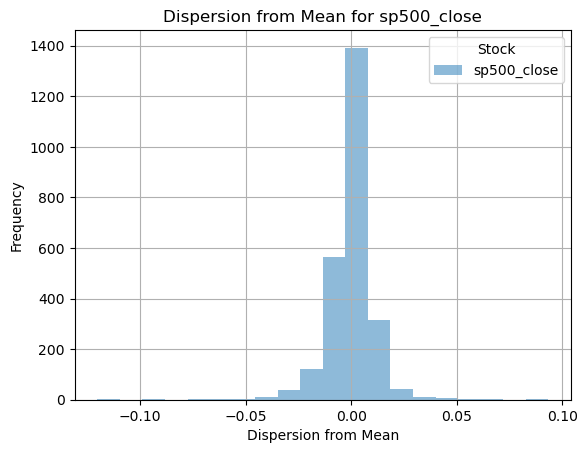

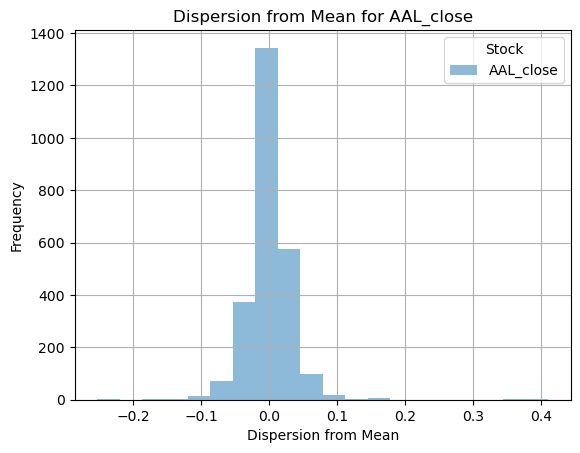

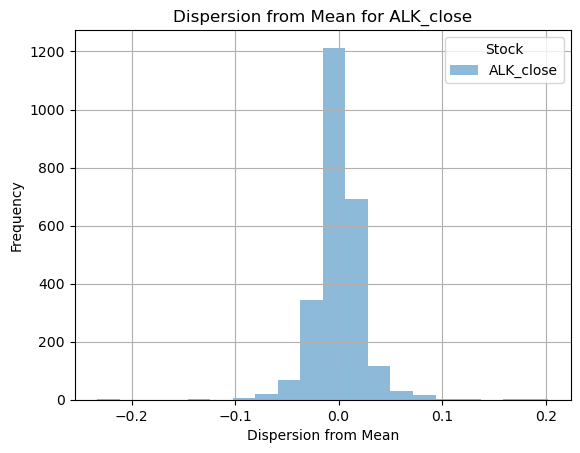

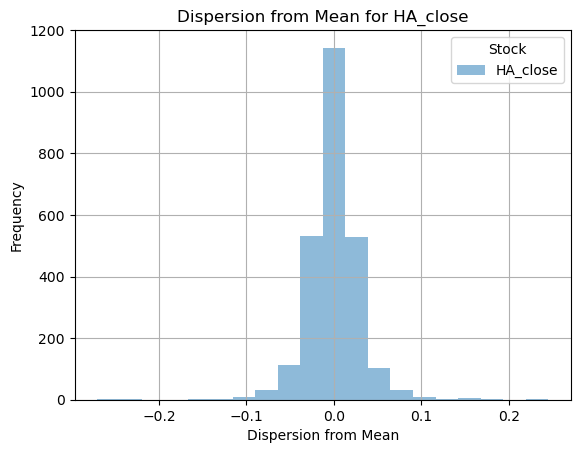

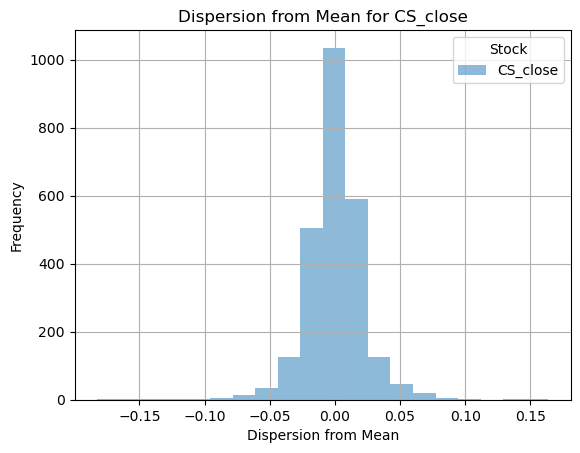

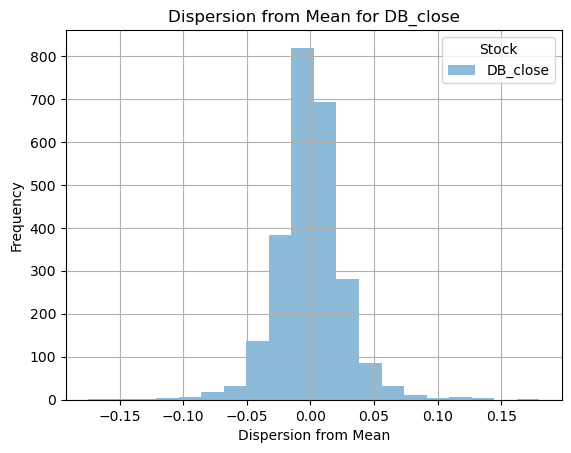

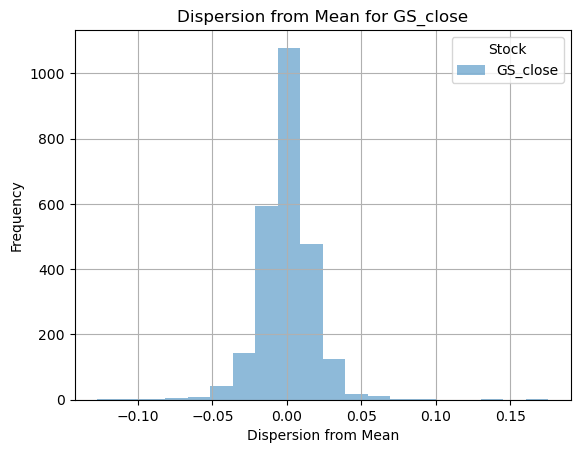

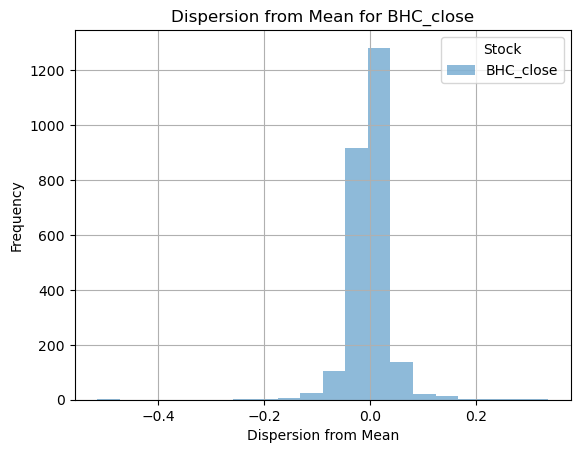

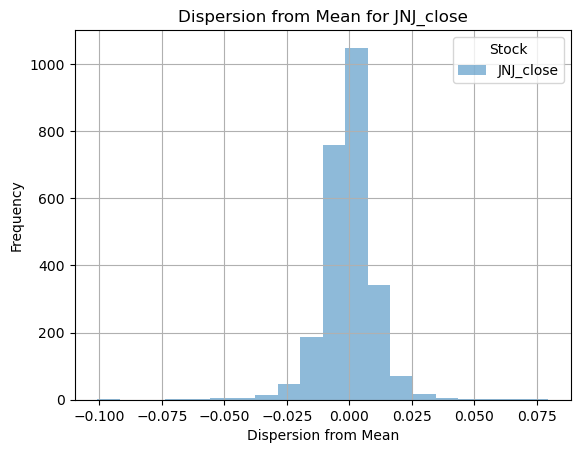

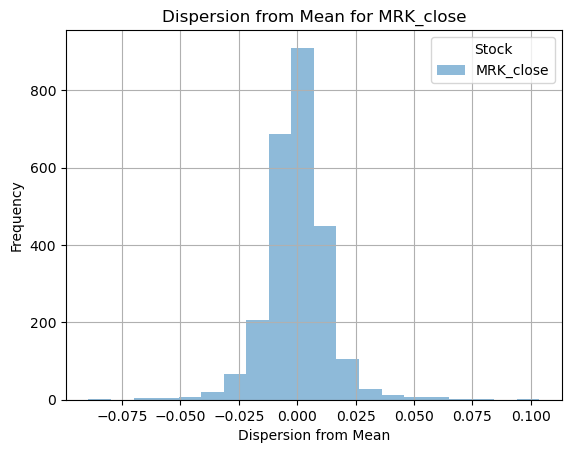

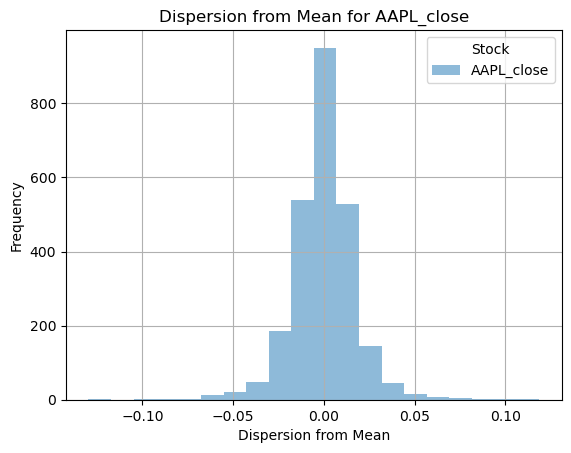

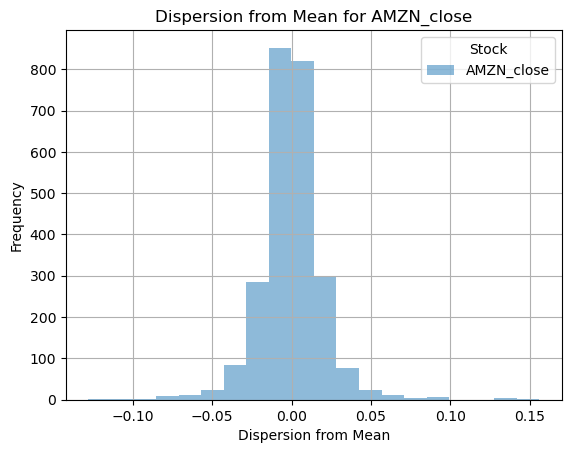

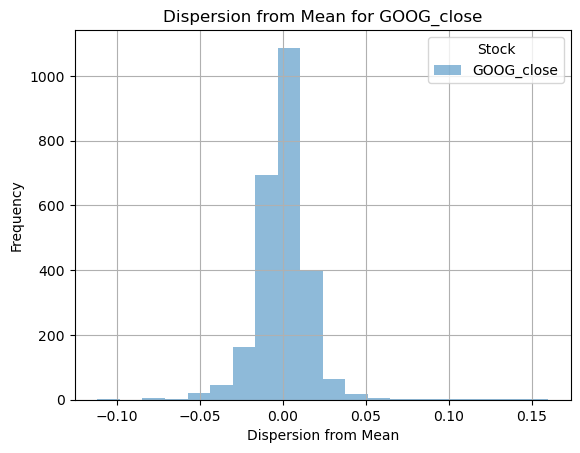

In [129]:
for stock in Close_names:
    plt.hist(all_stock_one[stock] - all_stock_one[stock].mean(), bins=20, alpha=0.5, label=stock)

    # Customize the plot
    plt.title(f'Dispersion from Mean for {stock}')
    plt.xlabel('Dispersion from Mean')
    plt.ylabel('Frequency')
    plt.legend(title='Stock')
    plt.grid(True)
    plt.show()

### Corelation among industry and stocks

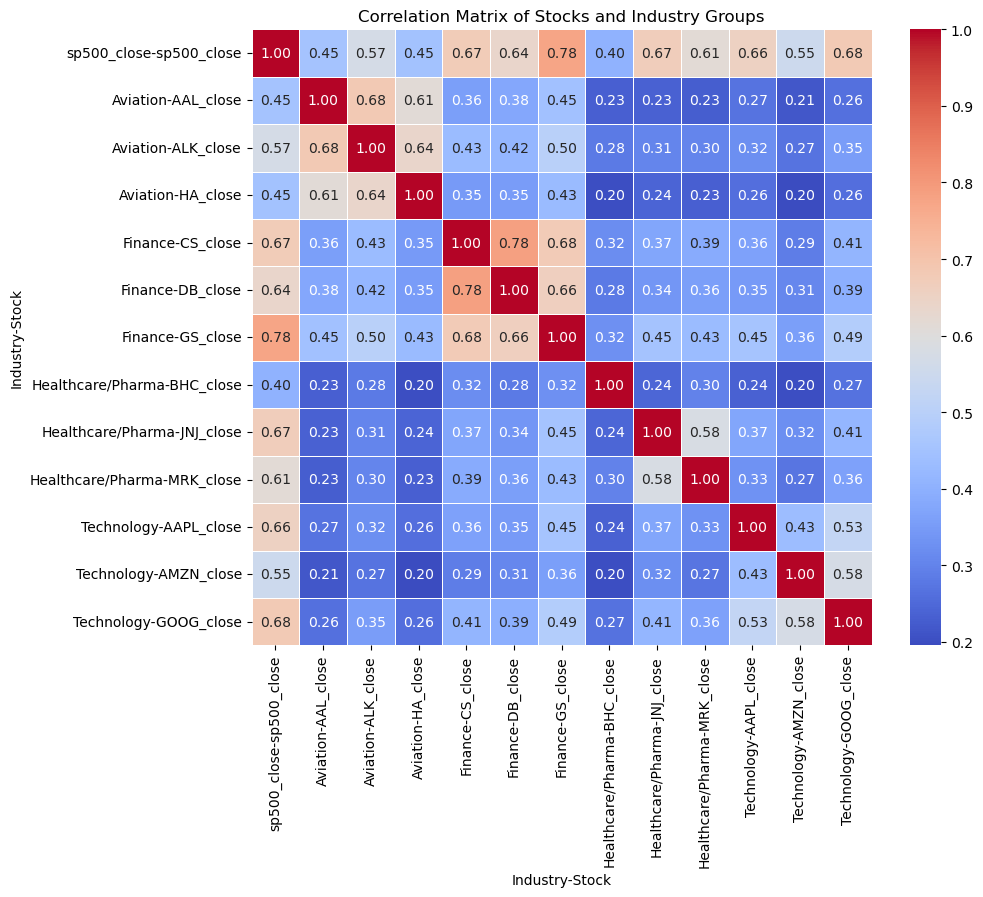

In [130]:
correlation_matrix = returns.corr()

# Plot correlation matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Stocks and Industry Groups')
plt.show()

In [131]:
# Finance industry have highest corelation among it's stocks followed by Aviation Industry

In [132]:
# Cross industry corelation is not so significantly seen

#### Descriptive summary of daily returns

In [133]:
stock_stats = returns.describe()

In [134]:
stock_stats.head(10)

Industry  sp500_close     Aviation                                Finance  \
Stock     sp500_close    AAL_close    ALK_close     HA_close     CS_close   
count     2516.000000  2516.000000  2516.000000  2516.000000  2516.000000   
mean         0.000488     0.000637     0.000709     0.000765    -0.000325   
std          0.010934     0.032726     0.023562     0.030147     0.022206   
min         -0.119841    -0.252246    -0.232385    -0.269722    -0.182598   
25%         -0.003308    -0.014116    -0.010126    -0.013826    -0.010897   
50%          0.000653     0.000216     0.000788     0.000451     0.000000   
75%          0.005229     0.015593     0.011655     0.015317     0.010796   
max          0.093828     0.410970     0.203079     0.245837     0.163447   

Industry                           Healthcare/Pharma               \
Stock        DB_close     GS_close         BHC_close    JNJ_close   
count     2516.000000  2516.000000       2516.000000  2516.000000   
mean        -0.000381     0.000291          0.000464     0.000409   
std          0.026374     0.018331          0.035700     0.010847   
min         -0.174888    -0.127053         -0.514629    -0.100379   
25%         -0.013920    -0.008367         -0.013011    -0.004283   
50%         -0.000495     0.000490          0.000431     0.000299   
75%          0.013712     0.009413          0.014973     0.005656   
max          0.179506     0.175803          0.337444     0.079977   

Industry                Technology                            
Stock       MRK_close   AAPL_close   AMZN_close   GOOG_close  
count     2516.000000  2516.000000  2516.000000  2516.000000  
mean         0.000410     0.001128     0.001398     0.000818  
std          0.013049     0.017719     0.019889     0.016288  
min         -0.088990    -0.128647    -0.126568    -0.111008  
25%         -0.006119    -0.006971    -0.008133    -0.006431  
50%          0.000283     0.000891     0.001107     0.000659  
75%          0.007303     0.010209     0.011457     0.008646  
max          0.104080     0.119808     0.157457     0.160524

#### Calculating annualized return

In [135]:
stock_stats.loc['annualized_return'] = stock_stats.loc['mean']*252

In [136]:
stock_stats.head(11)

Industry           sp500_close     Aviation                            \
Stock              sp500_close    AAL_close    ALK_close     HA_close   
count              2516.000000  2516.000000  2516.000000  2516.000000   
mean                  0.000488     0.000637     0.000709     0.000765   
std                   0.010934     0.032726     0.023562     0.030147   
min                  -0.119841    -0.252246    -0.232385    -0.269722   
25%                  -0.003308    -0.014116    -0.010126    -0.013826   
50%                   0.000653     0.000216     0.000788     0.000451   
75%                   0.005229     0.015593     0.011655     0.015317   
max                   0.093828     0.410970     0.203079     0.245837   
annualized_return     0.122966     0.160489     0.178792     0.192824   

Industry               Finance                           Healthcare/Pharma  \
Stock                 CS_close     DB_close     GS_close         BHC_close   
count              2516.000000  2516.000000  2516.000000       2516.000000   
mean                 -0.000325    -0.000381     0.000291          0.000464   
std                   0.022206     0.026374     0.018331          0.035700   
min                  -0.182598    -0.174888    -0.127053         -0.514629   
25%                  -0.010897    -0.013920    -0.008367         -0.013011   
50%                   0.000000    -0.000495     0.000490          0.000431   
75%                   0.010796     0.013712     0.009413          0.014973   
max                   0.163447     0.179506     0.175803          0.337444   
annualized_return    -0.081888    -0.096102     0.073212          0.116973   

Industry                                      Technology               \
Stock                JNJ_close    MRK_close   AAPL_close   AMZN_close   
count              2516.000000  2516.000000  2516.000000  2516.000000   
mean                  0.000409     0.000410     0.001128     0.001398   
std                   0.010847     0.013049     0.017719     0.019889   
min                  -0.100379    -0.088990    -0.128647    -0.126568   
25%                  -0.004283    -0.006119    -0.006971    -0.008133   
50%                   0.000299     0.000283     0.000891     0.001107   
75%                   0.005656     0.007303     0.010209     0.011457   
max                   0.079977     0.104080     0.119808     0.157457   
annualized_return     0.103009     0.103385     0.284164     0.352201   

Industry                        
Stock               GOOG_close  
count              2516.000000  
mean                  0.000818  
std                   0.016288  
min                  -0.111008  
25%                  -0.006431  
50%                   0.000659  
75%                   0.008646  
max                   0.160524  
annualized_return     0.206023

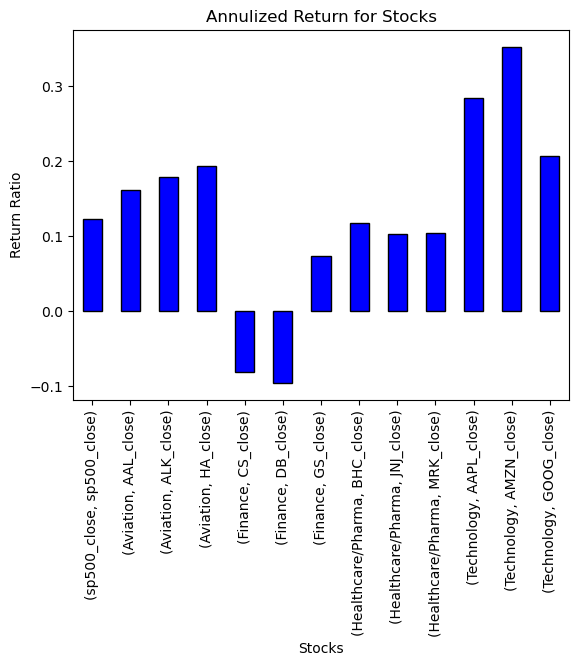

In [137]:
stock_stats.loc['annualized_return'].plot(kind='bar', rot=90, color='blue', edgecolor='black')
plt.title('Annulized Return for Stocks')
plt.xlabel('Stocks')
plt.ylabel('Return Ratio')
plt.show()

#### Calculating annualized risk

In [138]:
stock_stats.loc['annualized_risk'] = stock_stats.loc['std']*(252**.5)

In [139]:
stock_stats.head(10)

Industry           sp500_close     Aviation                            \
Stock              sp500_close    AAL_close    ALK_close     HA_close   
count              2516.000000  2516.000000  2516.000000  2516.000000   
mean                  0.000488     0.000637     0.000709     0.000765   
std                   0.010934     0.032726     0.023562     0.030147   
min                  -0.119841    -0.252246    -0.232385    -0.269722   
25%                  -0.003308    -0.014116    -0.010126    -0.013826   
50%                   0.000653     0.000216     0.000788     0.000451   
75%                   0.005229     0.015593     0.011655     0.015317   
max                   0.093828     0.410970     0.203079     0.245837   
annualized_return     0.122966     0.160489     0.178792     0.192824   
annualized_risk       0.173574     0.519504     0.374043     0.478573   

Industry               Finance                           Healthcare/Pharma  \
Stock                 CS_close     DB_close     GS_close         BHC_close   
count              2516.000000  2516.000000  2516.000000       2516.000000   
mean                 -0.000325    -0.000381     0.000291          0.000464   
std                   0.022206     0.026374     0.018331          0.035700   
min                  -0.182598    -0.174888    -0.127053         -0.514629   
25%                  -0.010897    -0.013920    -0.008367         -0.013011   
50%                   0.000000    -0.000495     0.000490          0.000431   
75%                   0.010796     0.013712     0.009413          0.014973   
max                   0.163447     0.179506     0.175803          0.337444   
annualized_return    -0.081888    -0.096102     0.073212          0.116973   
annualized_risk       0.352509     0.418676     0.290996          0.566714   

Industry                                      Technology               \
Stock                JNJ_close    MRK_close   AAPL_close   AMZN_close   
count              2516.000000  2516.000000  2516.000000  2516.000000   
mean                  0.000409     0.000410     0.001128     0.001398   
std                   0.010847     0.013049     0.017719     0.019889   
min                  -0.100379    -0.088990    -0.128647    -0.126568   
25%                  -0.004283    -0.006119    -0.006971    -0.008133   
50%                   0.000299     0.000283     0.000891     0.001107   
75%                   0.005656     0.007303     0.010209     0.011457   
max                   0.079977     0.104080     0.119808     0.157457   
annualized_return     0.103009     0.103385     0.284164     0.352201   
annualized_risk       0.172187     0.207142     0.281273     0.315735   

Industry                        
Stock               GOOG_close  
count              2516.000000  
mean                  0.000818  
std                   0.016288  
min                  -0.111008  
25%                  -0.006431  
50%                   0.000659  
75%                   0.008646  
max                   0.160524  
annualized_return     0.206023  
annualized_risk       0.258561

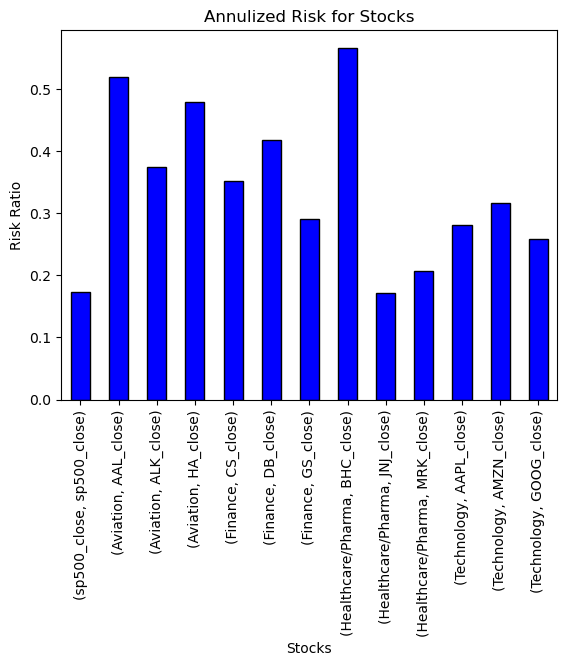

In [140]:
stock_stats.loc['annualized_risk'].plot(kind='bar', rot=90, color='blue', edgecolor='black')
plt.title('Annulized Risk for Stocks')
plt.xlabel('Stocks')
plt.ylabel('Risk Ratio')
plt.show()

## Cumulative Returns

### one year

In [141]:
all_df_one_year = all_df.tail(253).copy()

In [142]:
stock_stats.loc['1_year_return'] = (all_df_one_year.iloc[-1]-all_df_one_year.iloc[0])/all_df_one_year.iloc[0]

In [143]:
stock_stats.loc['1_year_minimum_return'] = (all_df_one_year.min()-all_df_one_year.iloc[0])/all_df_one_year.iloc[0]

In [144]:
stock_stats.loc['1_year_maximum_return'] = (all_df_one_year.max()-all_df_one_year.iloc[0])/all_df_one_year.iloc[0]

### Three years

In [145]:
all_df_three_year = all_df.tail(755).copy()

In [146]:
stock_stats.loc['3_year_return'] = (all_df_three_year.iloc[-1]-all_df_three_year.iloc[0])/all_df_three_year.iloc[0]

In [147]:
stock_stats.loc['3_year_minimum_return'] = (all_df_three_year.min()-all_df_three_year.iloc[0])/all_df_three_year.iloc[0]

In [148]:
stock_stats.loc['3_year_maximum_return'] = (all_df_three_year.max()-all_df_three_year.iloc[0])/all_df_three_year.iloc[0]

### Five years

In [149]:
all_df_five_year = all_df.tail(1259).copy()

In [150]:
stock_stats.loc['5_year_return'] = (all_df_five_year.iloc[-1]-all_df_five_year.iloc[0])/all_df_five_year.iloc[0]

In [151]:
stock_stats.loc['5_year_minimum_return'] = (all_df_five_year.min()-all_df_five_year.iloc[0])/all_df_five_year.iloc[0]

In [152]:
stock_stats.loc['5_year_maximum_return'] = (all_df_five_year.max()-all_df_five_year.iloc[0])/all_df_five_year.iloc[0]

### Ten years

In [153]:
stock_stats.loc['10_year_return'] = (all_df.iloc[-1]-all_df.iloc[0])/all_df.iloc[0]

In [154]:
stock_stats.loc['10_year_minimum_return'] = (all_df.min()-all_df.iloc[0])/all_df.iloc[0]

In [155]:
stock_stats.loc['10_year_maximum_return'] = (all_df.max()-all_df.iloc[0])/all_df.iloc[0]

In [156]:
stock_stats.drop(['min', '25%', '50%', '75%', 'max'],axis=0, inplace=True)

In [157]:
stock_stats.head(20)

Industry                sp500_close     Aviation                            \
Stock                   sp500_close    AAL_close    ALK_close     HA_close   
count                   2516.000000  2516.000000  2516.000000  2516.000000   
mean                       0.000488     0.000637     0.000709     0.000765   
std                        0.010934     0.032726     0.023562     0.030147   
annualized_return          0.122966     0.160489     0.178792     0.192824   
annualized_risk            0.173574     0.519504     0.374043     0.478573   
1_year_return              0.143780    -0.541418    -0.436028    -0.515596   
1_year_minimum_return     -0.239044    -0.662687    -0.637259    -0.675686   
1_year_maximum_return      0.217869     0.170149     0.107159     0.165727   
3_year_return              0.329711    -0.742510    -0.524471    -0.661235   
3_year_minimum_return     -0.115345    -0.810601    -0.694145    -0.773193   
3_year_maximum_return      0.415844     0.225016     0.058289     0.155059   
5_year_return              0.748085    -0.686480    -0.543438    -0.478771   
5_year_minimum_return     -0.049246    -0.769388    -0.706344    -0.651031   
5_year_maximum_return      0.861318     0.491582     0.249408     1.438334   
10_year_return             1.933941     0.322928     1.942760     1.162752   
10_year_minimum_return    -0.041012    -0.569429    -0.066479    -0.365772   
10_year_maximum_return     2.123988     5.293864     7.053023     9.117449   

Industry                    Finance                            \
Stock                      CS_close     DB_close     GS_close   
count                   2516.000000  2516.000000  2516.000000   
mean                      -0.000325    -0.000381     0.000291   
std                        0.022206     0.026374     0.018331   
annualized_return         -0.081888    -0.096102     0.073212   
annualized_risk            0.352509     0.418676     0.290996   
1_year_return             -0.160774     0.158621    -0.008486   
1_year_minimum_return     -0.438552    -0.244138    -0.334106   
1_year_maximum_return      0.180135     0.522759     0.232029   
3_year_return             -0.366984    -0.508484    -0.164887   
3_year_minimum_return     -0.576508    -0.679345    -0.439144   
3_year_maximum_return      0.268571     0.176126     0.136007   
5_year_return             -0.586135    -0.683258     0.141745   
5_year_minimum_return     -0.723122    -0.793363    -0.233212   
5_year_maximum_return      0.077626     0.159502     0.553119   
10_year_return            -0.763893    -0.840290     0.360664   
10_year_minimum_return    -0.842043    -0.895808    -0.406229   
10_year_maximum_return     0.101526     0.190675     0.850914   

Industry               Healthcare/Pharma                            \
Stock                          BHC_close    JNJ_close    MRK_close   
count                        2516.000000  2516.000000  2516.000000   
mean                            0.000464     0.000409     0.000410   
std                             0.035700     0.010847     0.013049   
annualized_return               0.116973     0.103009     0.103385   
annualized_risk                 0.566714     0.172187     0.207142   
1_year_return                  -0.209964     0.145319    -0.007894   
1_year_minimum_return          -0.340112    -0.145011    -0.205837   
1_year_maximum_return           0.621251     0.196323     0.100825   
3_year_return                   0.062927     0.134583     0.285050   
3_year_minimum_return          -0.243502    -0.153025    -0.174748   
3_year_maximum_return           1.181258     0.185109     0.425871   
5_year_return                  -0.913474     0.597939     0.680170   
5_year_minimum_return          -0.952617     0.000000    -0.015799   
5_year_maximum_return           0.015145     0.669099     0.864290   
10_year_return                 -0.396505     1.411012     1.266393   
10_year_minimum_return         -0.669515    -0.066235    -0.185519   
10_year_maximum_retur

In [158]:
cumulative_return_list = ['1_year_return','3_year_return','5_year_return','10_year_return']

In [159]:
stock_stats.loc[cumulative_return_list]

Industry       sp500_close  Aviation                       Finance            \
Stock          sp500_close AAL_close ALK_close  HA_close  CS_close  DB_close   
1_year_return     0.143780 -0.541418 -0.436028 -0.515596 -0.160774  0.158621   
3_year_return     0.329711 -0.742510 -0.524471 -0.661235 -0.366984 -0.508484   
5_year_return     0.748085 -0.686480 -0.543438 -0.478771 -0.586135 -0.683258   
10_year_return    1.933941  0.322928  1.942760  1.162752 -0.763893 -0.840290   

Industry                 Healthcare/Pharma                     Technology  \
Stock           GS_close         BHC_close JNJ_close MRK_close AAPL_close   
1_year_return  -0.008486         -0.209964  0.145319 -0.007894   1.062603   
3_year_return  -0.164887          0.062927  0.134583  0.285050   2.011768   
5_year_return   0.141745         -0.913474  0.597939  0.680170   3.227414   
10_year_return  0.360664         -0.396505  1.411012  1.266393  10.477700   

Industry                              
Stock          AMZN_close GOOG_close  
1_year_return    0.814150   0.219484  
3_year_return    2.282697   0.541641  
5_year_return    5.046878   1.404096  
10_year_return  19.484873   4.612832

In [160]:
stock_stats_one = stock_stats.droplevel(level=0, axis=1)

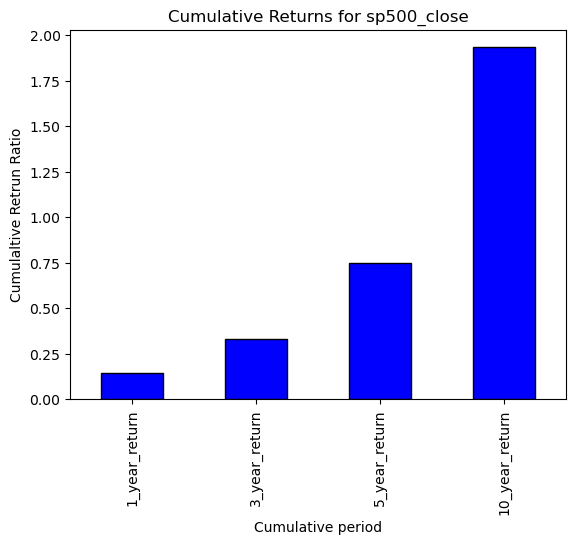

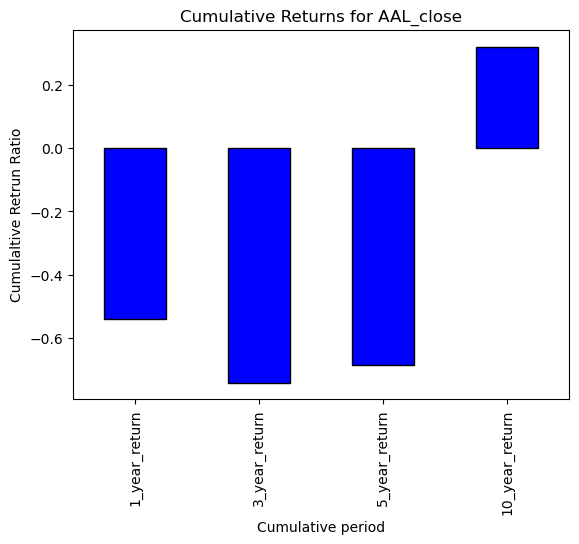

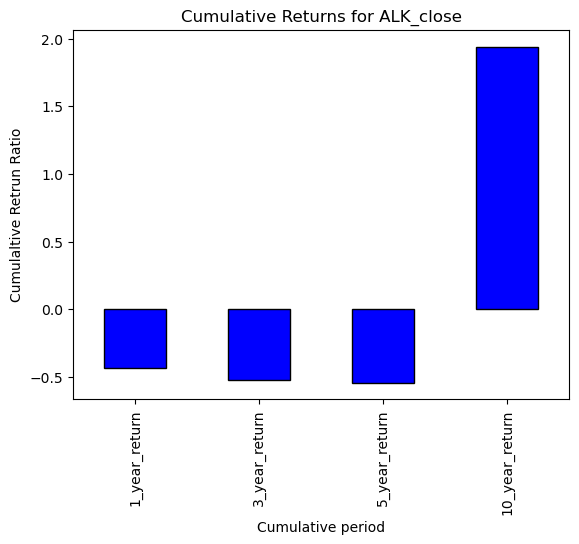

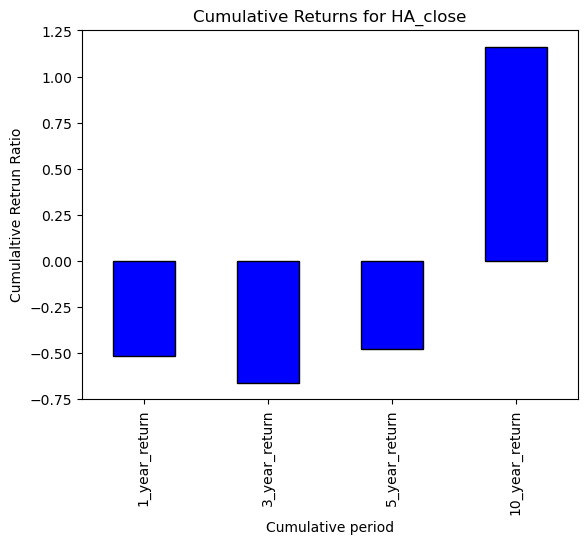

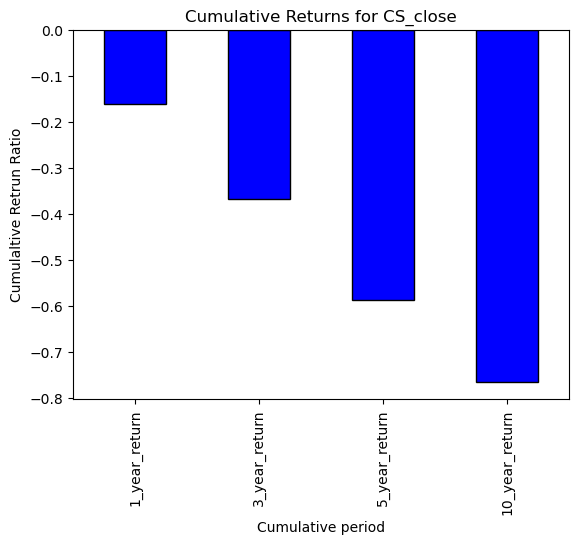

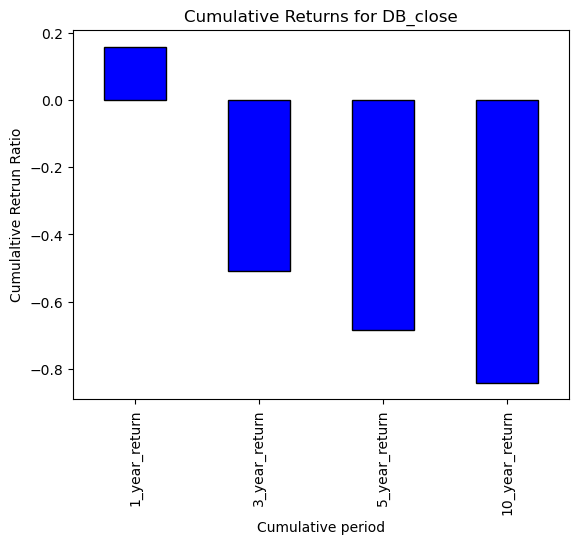

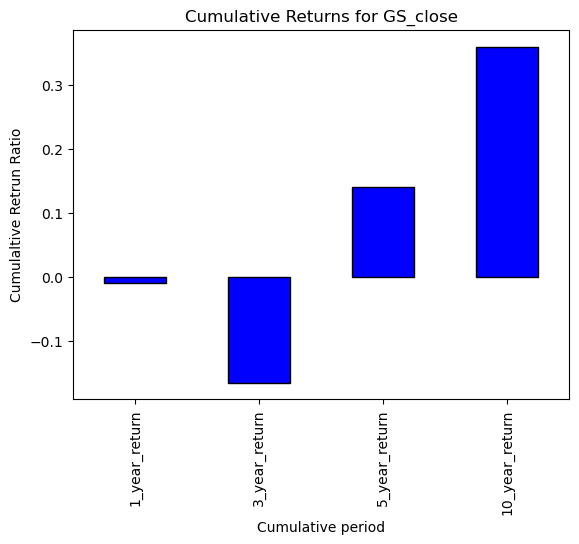

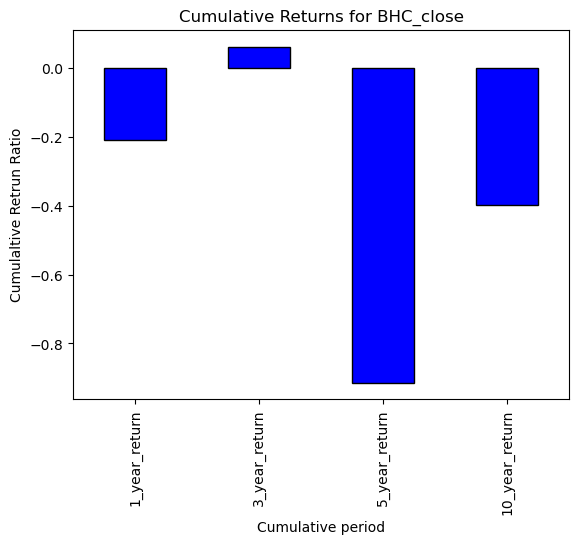

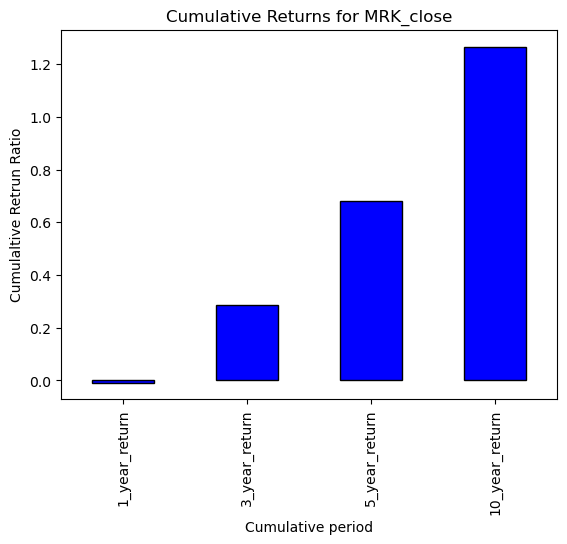

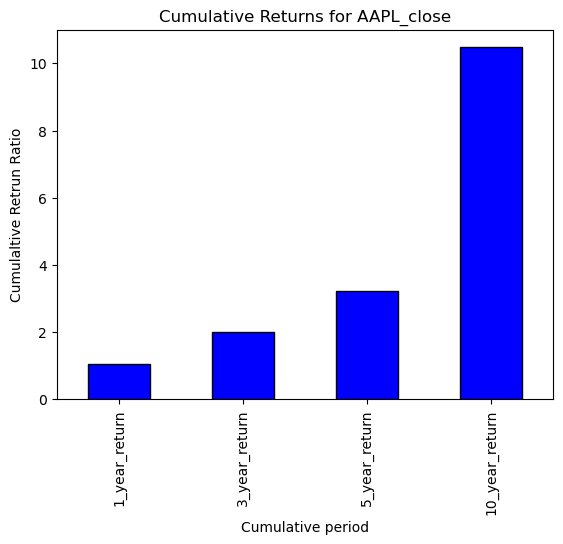

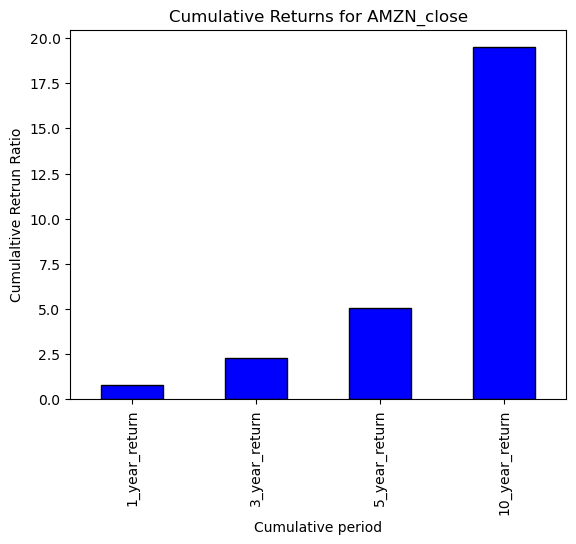

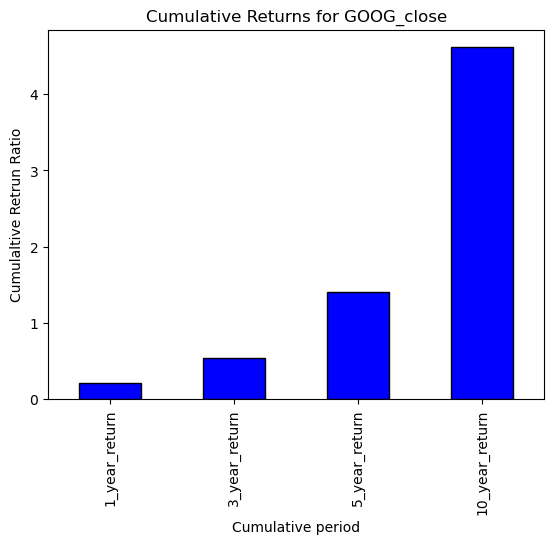

In [161]:
for stock in stock_stats_one.columns:
    stock_stats_one[stock].loc[cumulative_return_list].plot(kind='bar', rot=90, color='blue', edgecolor='black')
    plt.title(f'Cumulative Returns for {stock}')
    plt.xlabel('Cumulative period')
    plt.ylabel('Cumulaltive Retrun Ratio')
    plt.show()

#### Calculating Beta value for stocks

In [162]:
returns_one = returns.droplevel(level=0, axis=1)

In [163]:
returns_one.head()

Stock          sp500_close  AAL_close  ALK_close  HA_close  CS_close  \
Date                                                                   
(04-10-2010,)    -0.008035  -0.018299  -0.024503 -0.035235 -0.007401   
(05-10-2010,)     0.020861   0.012061   0.005971  0.017391  0.029590   
(06-10-2010,)    -0.000672   0.000000  -0.002251  0.020513  0.006563   
(07-10-2010,)    -0.001647   0.001083  -0.046154  0.030151  0.005396   
(08-10-2010,)     0.006122  -0.018398   0.036344  0.000000 -0.015653   

Stock          DB_close  GS_close  BHC_close  JNJ_close  MRK_close  \
Date                                                                 
(04-10-2010,) -0.015965 -0.007651   0.004660  -0.001296  -0.002186   
(05-10-2010,)  0.042404  0.020468   0.016621   0.018323   0.013691   
(06-10-2010,)  0.012204  0.008491   0.014829   0.006529  -0.000270   
(07-10-2010,) -0.010484  0.001790  -0.003372   0.000158  -0.008106   
(08-10-2010,) -0.003002  0.010257   0.009023   0.000158   0.005448   

Stock          AAPL_close  AMZN_close  GOOG_close  
Date                                               
(04-10-2010,)   -0.013734    0.010930   -0.006221  
(05-10-2010,)    0.036965    0.035266    0.030401  
(06-10-2010,)    0.000865   -0.034003   -0.007209  
(07-10-2010,)    0.000104    0.005599   -0.008122  
(08-10-2010,)    0.016769   -0.004607    0.011962

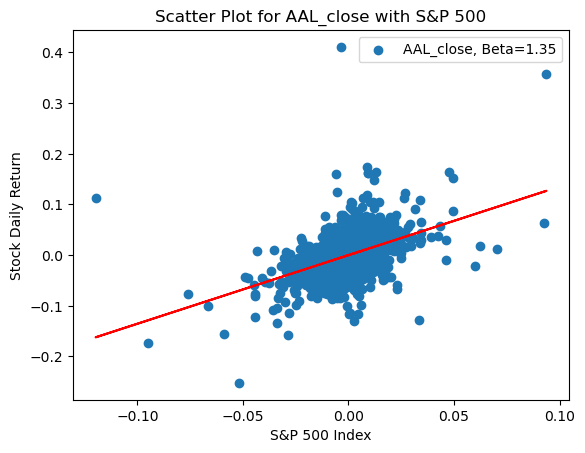

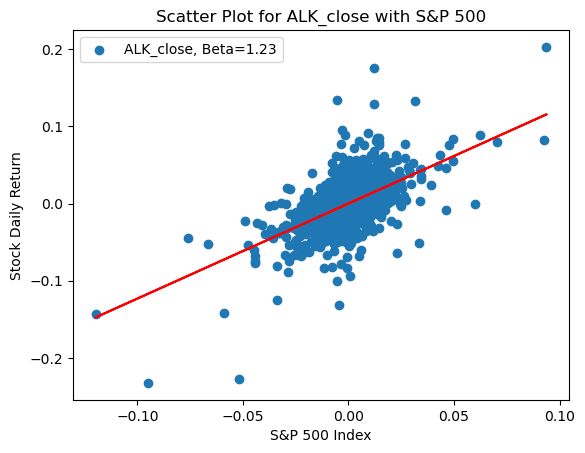

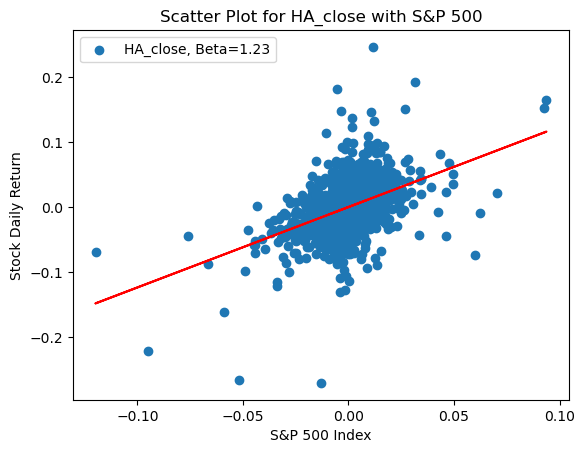

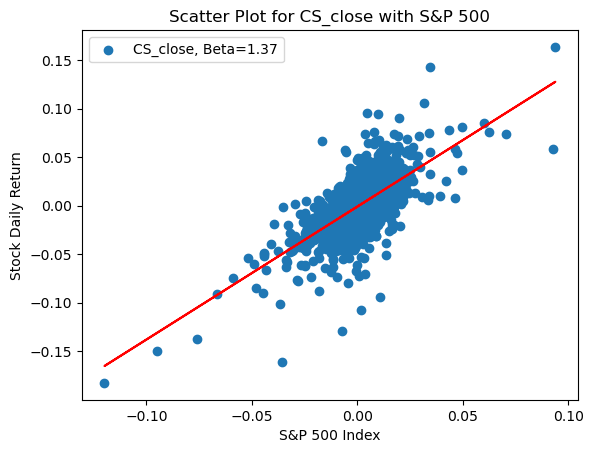

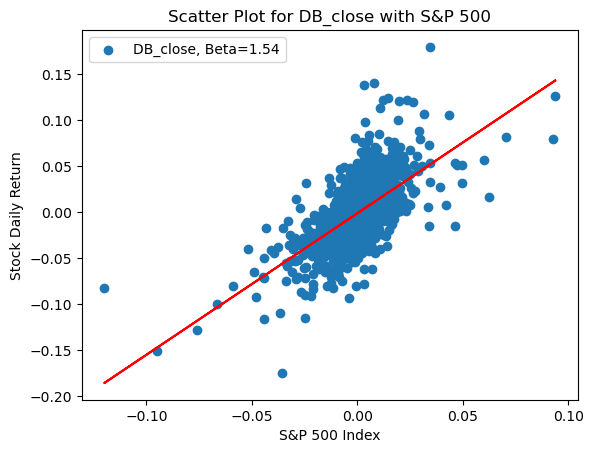

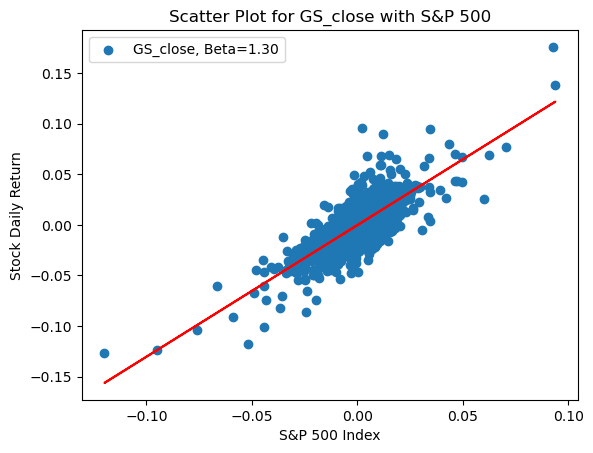

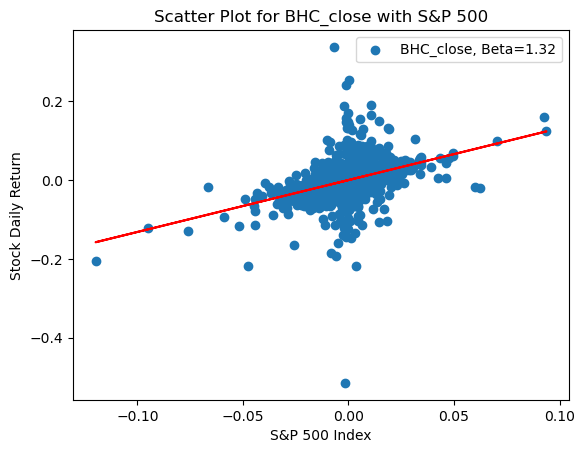

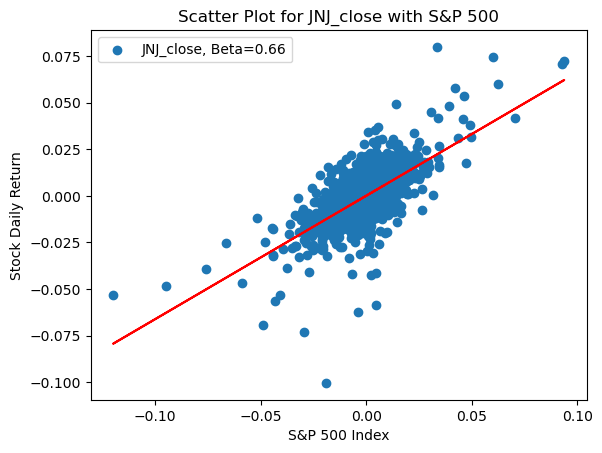

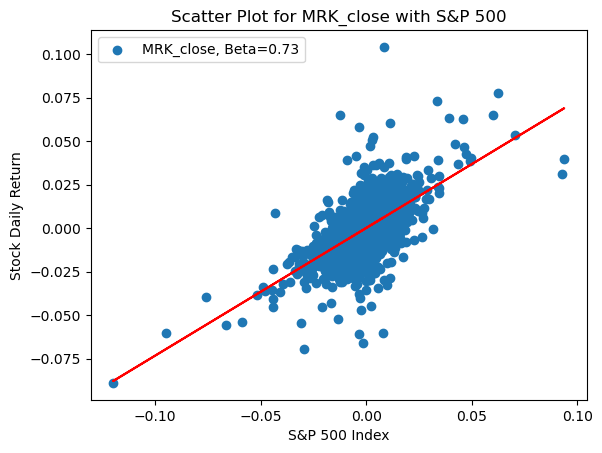

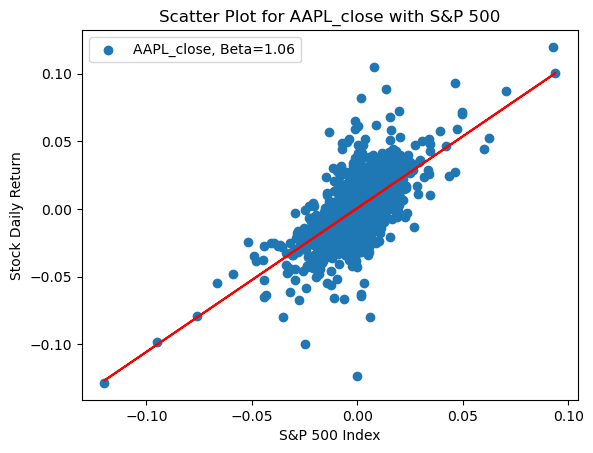

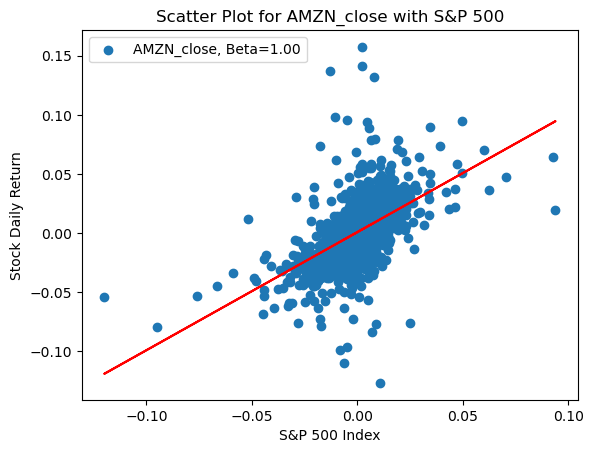

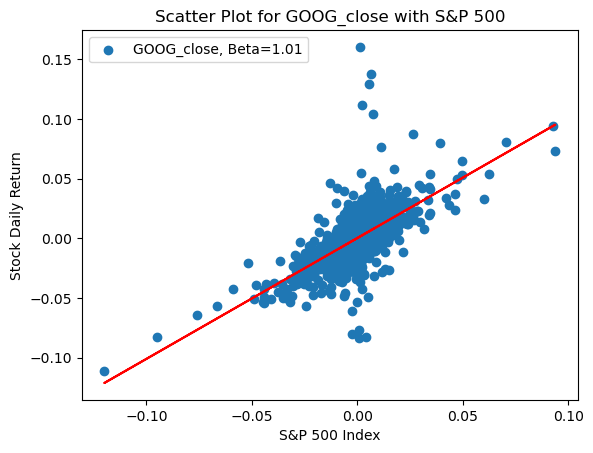

In [164]:
beta_values = []
for stock in Close_names[1:]:
    X = returns_one['sp500_close']
    y = returns_one[stock]
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    beta = model.params['sp500_close']
    beta_values.append(beta)
    plt.scatter(returns_one['sp500_close'], returns_one[stock], label=f'{stock}, Beta={beta:.2f}')
    plt.plot(returns['sp500_close'], model.fittedvalues, color='red')
    # Customize the plot
    plt.title(f'Scatter Plot for {stock} with S&P 500')
    plt.xlabel('S&P 500 Index')
    plt.ylabel('Stock Daily Return')
    plt.legend()
    plt.show()


In [165]:
beta_values

[1.3536094634798042,
 1.2315115898862594,
 1.2335339425572704,
 1.3700019522413447,
 1.5375460427388266,
 1.301285658409192,
 1.3159710386619645,
 0.6622329843503922,
 0.7334754871166239,
 1.0633490784512956,
 0.9988023228754591,
 1.0133380303647952]

In [166]:
beta_values.insert(0,0)

In [167]:
stock_stats.loc['beta'] = beta_values

In [168]:
stock_stats.head(20)

Industry                sp500_close     Aviation                            \
Stock                   sp500_close    AAL_close    ALK_close     HA_close   
count                   2516.000000  2516.000000  2516.000000  2516.000000   
mean                       0.000488     0.000637     0.000709     0.000765   
std                        0.010934     0.032726     0.023562     0.030147   
annualized_return          0.122966     0.160489     0.178792     0.192824   
annualized_risk            0.173574     0.519504     0.374043     0.478573   
1_year_return              0.143780    -0.541418    -0.436028    -0.515596   
1_year_minimum_return     -0.239044    -0.662687    -0.637259    -0.675686   
1_year_maximum_return      0.217869     0.170149     0.107159     0.165727   
3_year_return              0.329711    -0.742510    -0.524471    -0.661235   
3_year_minimum_return     -0.115345    -0.810601    -0.694145    -0.773193   
3_year_maximum_return      0.415844     0.225016     0.058289     0.155059   
5_year_return              0.748085    -0.686480    -0.543438    -0.478771   
5_year_minimum_return     -0.049246    -0.769388    -0.706344    -0.651031   
5_year_maximum_return      0.861318     0.491582     0.249408     1.438334   
10_year_return             1.933941     0.322928     1.942760     1.162752   
10_year_minimum_return    -0.041012    -0.569429    -0.066479    -0.365772   
10_year_maximum_return     2.123988     5.293864     7.053023     9.117449   
beta                       0.000000     1.353609     1.231512     1.233534   

Industry                    Finance                            \
Stock                      CS_close     DB_close     GS_close   
count                   2516.000000  2516.000000  2516.000000   
mean                      -0.000325    -0.000381     0.000291   
std                        0.022206     0.026374     0.018331   
annualized_return         -0.081888    -0.096102     0.073212   
annualized_risk            0.352509     0.418676     0.290996   
1_year_return             -0.160774     0.158621    -0.008486   
1_year_minimum_return     -0.438552    -0.244138    -0.334106   
1_year_maximum_return      0.180135     0.522759     0.232029   
3_year_return             -0.366984    -0.508484    -0.164887   
3_year_minimum_return     -0.576508    -0.679345    -0.439144   
3_year_maximum_return      0.268571     0.176126     0.136007   
5_year_return             -0.586135    -0.683258     0.141745   
5_year_minimum_return     -0.723122    -0.793363    -0.233212   
5_year_maximum_return      0.077626     0.159502     0.553119   
10_year_return            -0.763893    -0.840290     0.360664   
10_year_minimum_return    -0.842043    -0.895808    -0.406229   
10_year_maximum_return     0.101526     0.190675     0.850914   
beta                       1.370002     1.537546     1.301286   

Industry               Healthcare/Pharma                            \
Stock                          BHC_close    JNJ_close    MRK_close   
count                        2516.000000  2516.000000  2516.000000   
mean                            0.000464     0.000409     0.000410   
std                             0.035700     0.010847     0.013049   
annualized_return               0.116973     0.103009     0.103385   
annualized_risk                 0.566714     0.172187     0.207142   
1_year_return                  -0.209964     0.145319    -0.007894   
1_year_minimum_return          -0.340112    -0.145011    -0.205837   
1_year_maximum_return           0.621251     0.196323     0.100825   
3_year_return                   0.062927     0.134583     0.285050   
3_year_minimum_return          -0.243502    -0.153025    -0.174748   
3_year_maximum_return           1.181258     0.185109     0.425871   
5_year_return                  -0.913474     0.597939     0.680170   
5_year_minimum_return          -0.952617     0.000000    -0.015799   
5_year_maximum_return           0.015145     0.669099     0.864290   
10_year_return    

In [169]:
stock_stats.to_csv('stock_stats.csv')

#### Calculating Expected Return

In [170]:
sp500_return = stock_stats.loc['annualized_return'][0] 

In [171]:
risk_free_return = 0.0075

In [172]:
stock_stats.loc['expected_return'] = risk_free_return+stock_stats.loc['beta']*(sp500_return - risk_free_return)

In [173]:
stock_stats.loc['expected_return'][0] = np.nan
stock_stats.loc['beta'][0] = np.nan

In [174]:
stock_stats.head(15)

Industry               sp500_close     Aviation                            \
Stock                  sp500_close    AAL_close    ALK_close     HA_close   
count                  2516.000000  2516.000000  2516.000000  2516.000000   
mean                      0.000488     0.000637     0.000709     0.000765   
std                       0.010934     0.032726     0.023562     0.030147   
annualized_return         0.122966     0.160489     0.178792     0.192824   
annualized_risk           0.173574     0.519504     0.374043     0.478573   
1_year_return             0.143780    -0.541418    -0.436028    -0.515596   
1_year_minimum_return    -0.239044    -0.662687    -0.637259    -0.675686   
1_year_maximum_return     0.217869     0.170149     0.107159     0.165727   
3_year_return             0.329711    -0.742510    -0.524471    -0.661235   
3_year_minimum_return    -0.115345    -0.810601    -0.694145    -0.773193   
3_year_maximum_return     0.415844     0.225016     0.058289     0.155059   
5_year_return             0.748085    -0.686480    -0.543438    -0.478771   
5_year_minimum_return    -0.049246    -0.769388    -0.706344    -0.651031   
5_year_maximum_return     0.861318     0.491582     0.249408     1.438334   
10_year_return            1.933941     0.322928     1.942760     1.162752   

Industry                   Finance                            \
Stock                     CS_close     DB_close     GS_close   
count                  2516.000000  2516.000000  2516.000000   
mean                     -0.000325    -0.000381     0.000291   
std                       0.022206     0.026374     0.018331   
annualized_return        -0.081888    -0.096102     0.073212   
annualized_risk           0.352509     0.418676     0.290996   
1_year_return            -0.160774     0.158621    -0.008486   
1_year_minimum_return    -0.438552    -0.244138    -0.334106   
1_year_maximum_return     0.180135     0.522759     0.232029   
3_year_return            -0.366984    -0.508484    -0.164887   
3_year_minimum_return    -0.576508    -0.679345    -0.439144   
3_year_maximum_return     0.268571     0.176126     0.136007   
5_year_return            -0.586135    -0.683258     0.141745   
5_year_minimum_return    -0.723122    -0.793363    -0.233212   
5_year_maximum_return     0.077626     0.159502     0.553119   
10_year_return           -0.763893    -0.840290     0.360664   

Industry              Healthcare/Pharma                            \
Stock                         BHC_close    JNJ_close    MRK_close   
count                       2516.000000  2516.000000  2516.000000   
mean                           0.000464     0.000409     0.000410   
std                            0.035700     0.010847     0.013049   
annualized_return              0.116973     0.103009     0.103385   
annualized_risk                0.566714     0.172187     0.207142   
1_year_return                 -0.209964     0.145319    -0.007894   
1_year_minimum_return         -0.340112    -0.145011    -0.205837   
1_year_maximum_return          0.621251     0.196323     0.100825   
3_year_return                  0.062927     0.134583     0.285050   
3_year_minimum_return         -0.243502    -0.153025    -0.174748   
3_year_maximum_return          1.181258     0.185109     0.425871   
5_year_return                 -0.913474     0.597939     0.680170   
5_year_minimum_return         -0.952617     0.000000    -0.015799   
5_year_maximum_return          0.015145     0.669099     0.864290   
10_year_return                -0.396505     1.411012     1.266393   

Industry                Technology                            
Stock                   AAPL_close   AMZN_close   GOOG_close  
count                  2516.000000  2516.000000  2516.000000  
mean                      0.001128     0.001398     0.000818  
std                       0.017719     0.019889     0.016288  
annualized_return         0.284164     0.352201     0.206023  
annualized_risk           0.281273     0.315735  

### Selecting the stocks for the portfolio using CAPM (expected return) - optimised in excel for fund allocation ratio to get best return with more stability

In [175]:
select_names = ['ALK_close','JNJ_close','MRK_close','AAPL_close','AMZN_close','GOOG_close']

In [176]:
stock_stats_one = stock_stats.droplevel(level=0, axis=1)

In [177]:
stock_stats_one = stock_stats_one[select_names]

### Assigning weights to each selected stock to check the portfolio return and risk - Optimisation is done in Excel

In [178]:
stock_weight = 1/len(select_names)
# stock_weight = [0.16,0.16,0.17,0.17,0.17,0.17]

In [179]:
stock_stats_one.loc['invest_ratio'] = stock_weight

In [180]:
stock_stats_one.head(16)

Stock                     ALK_close    JNJ_close    MRK_close   AAPL_close  \
count                   2516.000000  2516.000000  2516.000000  2516.000000   
mean                       0.000709     0.000409     0.000410     0.001128   
std                        0.023562     0.010847     0.013049     0.017719   
annualized_return          0.178792     0.103009     0.103385     0.284164   
annualized_risk            0.374043     0.172187     0.207142     0.281273   
1_year_return             -0.436028     0.145319    -0.007894     1.062603   
1_year_minimum_return     -0.637259    -0.145011    -0.205837    -0.025068   
1_year_maximum_return      0.107159     0.196323     0.100825     1.389777   
3_year_return             -0.524471     0.134583     0.285050     2.011768   
3_year_minimum_return     -0.694145    -0.153025    -0.174748    -0.075548   
3_year_maximum_return      0.058289     0.185109     0.425871     2.489500   
5_year_return             -0.543438     0.597939     0.680170     3.227414   
5_year_minimum_return     -0.706344     0.000000    -0.015799    -0.175580   
5_year_maximum_return      0.249408     0.669099     0.864290     3.897974   
10_year_return             1.942760     1.411012     1.266393    10.477700   
10_year_minimum_return    -0.066479    -0.066235    -0.185519    -0.013734   

Stock                    AMZN_close   GOOG_close  
count                   2516.000000  2516.000000  
mean                       0.001398     0.000818  
std                        0.019889     0.016288  
annualized_return          0.352201     0.206023  
annualized_risk            0.315735     0.258561  
1_year_return              0.814150     0.219484  
1_year_minimum_return     -0.034016    -0.123210  
1_year_maximum_return      1.034656     0.434138  
3_year_return              2.282697     0.541641  
3_year_minimum_return     -0.002179    -0.001668  
3_year_maximum_return      2.681700     0.813002  
5_year_return              5.046878     1.404096  
5_year_minimum_return     -0.074224     0.000000  
5_year_maximum_return      5.781860     1.827267  
10_year_return            19.484873     4.612832  
10_year_minimum_return    -0.004424    -0.096534

In [181]:
weight = stock_stats_one.loc['invest_ratio'].tolist()

## Portfolio performance Analysis

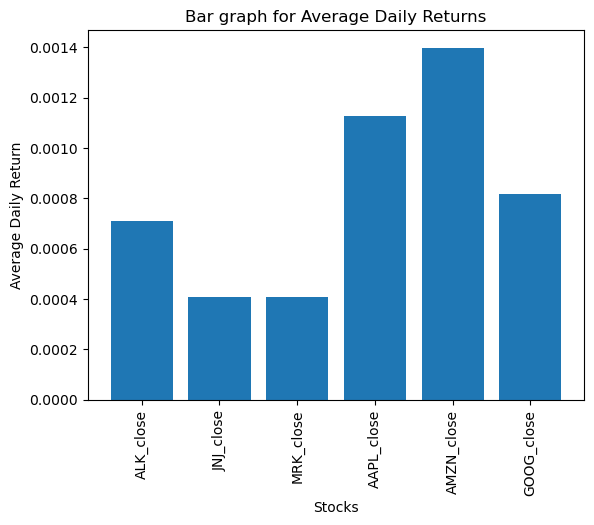

In [182]:
plt.bar(stock_stats_one.columns, stock_stats_one.loc['mean'])

# Adding labels and title
plt.xlabel('Stocks')
plt.ylabel('Average Daily Return')
plt.title('Bar graph for Average Daily Returns')
plt.xticks(rotation=90)

# Displaying the plot
plt.show()

### Portfolio daily returns

In [183]:
portfolio_df_one = returns_one[select_names]

In [184]:
portfolio_df_one.tail()

Stock          ALK_close  JNJ_close  MRK_close  AAPL_close  AMZN_close  \
Date                                                                     
(24-09-2020,)  -0.031470   0.001592   0.006293    0.010269    0.006644   
(25-09-2020,)   0.028011   0.006843  -0.002646    0.037516    0.024949   
(28-09-2020,)   0.022888   0.009955  -0.002050    0.023869    0.025498   
(29-09-2020,)  -0.023175  -0.000340  -0.010391   -0.007568   -0.009190   
(30-09-2020,)  -0.001091   0.012376   0.012820    0.015076    0.001224   

Stock          GOOG_close  
Date                       
(24-09-2020,)    0.009242  
(25-09-2020,)    0.011671  
(28-09-2020,)    0.013537  
(29-09-2020,)    0.003284  
(30-09-2020,)    0.000184

In [185]:
# Portfolio daily returns
portfolio_df_one['Portfolio_Daily_Return'] = portfolio_df_one.dot(weight)
portfolio_df_one.tail(5)

Stock          ALK_close  JNJ_close  MRK_close  AAPL_close  AMZN_close  \
Date                                                                     
(24-09-2020,)  -0.031470   0.001592   0.006293    0.010269    0.006644   
(25-09-2020,)   0.028011   0.006843  -0.002646    0.037516    0.024949   
(28-09-2020,)   0.022888   0.009955  -0.002050    0.023869    0.025498   
(29-09-2020,)  -0.023175  -0.000340  -0.010391   -0.007568   -0.009190   
(30-09-2020,)  -0.001091   0.012376   0.012820    0.015076    0.001224   

Stock          GOOG_close  Portfolio_Daily_Return  
Date                                               
(24-09-2020,)    0.009242                0.000428  
(25-09-2020,)    0.011671                0.017724  
(28-09-2020,)    0.013537                0.015616  
(29-09-2020,)    0.003284               -0.007897  
(30-09-2020,)    0.000184                0.006765

<AxesSubplot:xlabel='Date'>

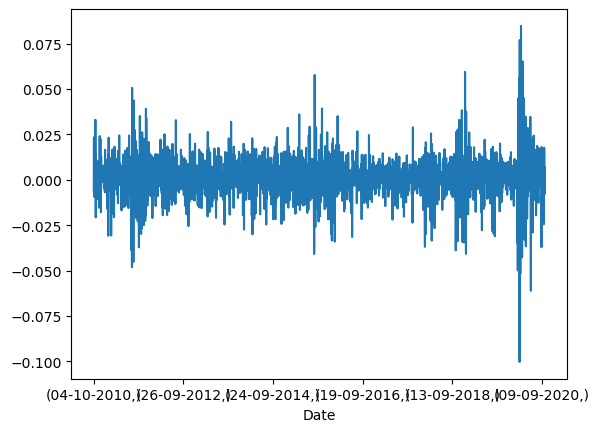

In [186]:
portfolio_df_one['Portfolio_Daily_Return'].plot()

### Cumulative return

In [187]:
# Cumulative return from the portfolio
Cumulative_returns_daily = (1+portfolio_df_one).cumprod()
Cumulative_returns_daily.tail(5)

Stock          ALK_close  JNJ_close  MRK_close  AAPL_close  AMZN_close  \
Date                                                                     
(24-09-2020,)   2.868046   2.342834   2.271858   10.725471   19.646021   
(25-09-2020,)   2.948383   2.358866   2.265847   11.127849   20.136164   
(28-09-2020,)   3.015867   2.382348   2.261202   11.393459   20.649599   
(29-09-2020,)   2.945973   2.381538   2.237705   11.307234   20.459825   
(30-09-2020,)   2.942760   2.411012   2.266393   11.477700   20.484873   

Stock          GOOG_close  Portfolio_Daily_Return  
Date                                               
(24-09-2020,)    5.455057                6.270151  
(25-09-2020,)    5.518724                6.381284  
(28-09-2020,)    5.593430                6.480935  
(29-09-2020,)    5.611801                6.429757  
(30-09-2020,)    5.612832                6.473253

<AxesSubplot:xlabel='Date'>

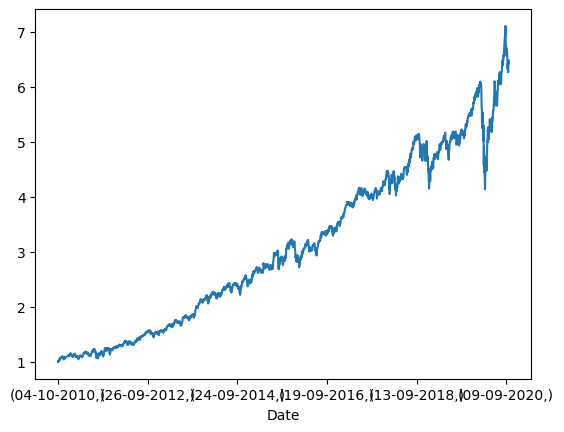

In [188]:
Cumulative_returns_daily['Portfolio_Daily_Return'].plot()

### Portfolio risk

In [189]:
covariance_portfolio = portfolio_df_one.iloc[:,:-1]
covariance_portfolio = (covariance_portfolio.cov())*252

covariance_portfolio

Stock       ALK_close  JNJ_close  MRK_close  AAPL_close  AMZN_close  \
Stock                                                                 
ALK_close    0.139908   0.019655   0.023591    0.034074    0.031852   
JNJ_close    0.019655   0.029648   0.020663    0.018014    0.017524   
MRK_close    0.023591   0.020663   0.042908    0.019160    0.017795   
AAPL_close   0.034074   0.018014   0.019160    0.079115    0.038568   
AMZN_close   0.031852   0.017524   0.017795    0.038568    0.099689   
GOOG_close   0.034216   0.018386   0.019540    0.038189    0.046959   

Stock       GOOG_close  
Stock                   
ALK_close     0.034216  
JNJ_close     0.018386  
MRK_close     0.019540  
AAPL_close    0.038189  
AMZN_close    0.046959  
GOOG_close    0.066854

In [190]:
portfolio_variance = np.dot(np.transpose(weight),np.dot(covariance_portfolio, weight))

In [191]:
portfolio_risk = np.sqrt(portfolio_variance)
portfolio_risk

0.18667331830270362

### Sharpe Ratio

In [192]:
Sharpe_Ratio = portfolio_df_one['Portfolio_Daily_Return'].mean() / portfolio_df_one['Portfolio_Daily_Return'].std()
Sharpe_Ratio

0.06904209224156535

In [193]:
Annualised_Sharpe_Ratio = (252**0.5)*Sharpe_Ratio
Annualised_Sharpe_Ratio

1.0960092364005836

### Portfolio beta

In [194]:
portfolio_beta = (stock_stats_one.loc['beta']*stock_stats_one.loc['invest_ratio']).sum()

In [195]:
portfolio_beta

0.9504515821741376

### Portfolio expected Return

In [196]:
portfolio_return = (stock_stats_one.loc['expected_return']*stock_stats_one.loc['invest_ratio']).sum()

In [197]:
portfolio_return

0.11724478965265235

## Model Building for portfolio stocks

## Model for Alaska Airline

In [198]:
df = ALK_data.copy()

In [199]:
df.head()

Date     Open     High      Low    Close  Adj Close     Volume
0  01-10-2010  12.9325  12.9625  12.3675  12.4475  10.972344  1663600.0
1  04-10-2010  12.4300  12.5900  11.9975  12.1425  10.703489  1512400.0
2  05-10-2010  12.2600  12.2850  11.9450  12.2150  10.767396  2567200.0
3  06-10-2010  12.2200  12.3950  12.0875  12.1875  10.743157  1043600.0
4  07-10-2010  12.2775  12.3450  11.2150  11.6250  10.247319  7682400.0

In [200]:
df.set_index('Date',inplace=True)

In [201]:
df = df[['Adj Close','Volume']]

In [202]:
df.rename(columns={'Adj Close': 'price', 'Volume': 'volume'}, inplace=True)

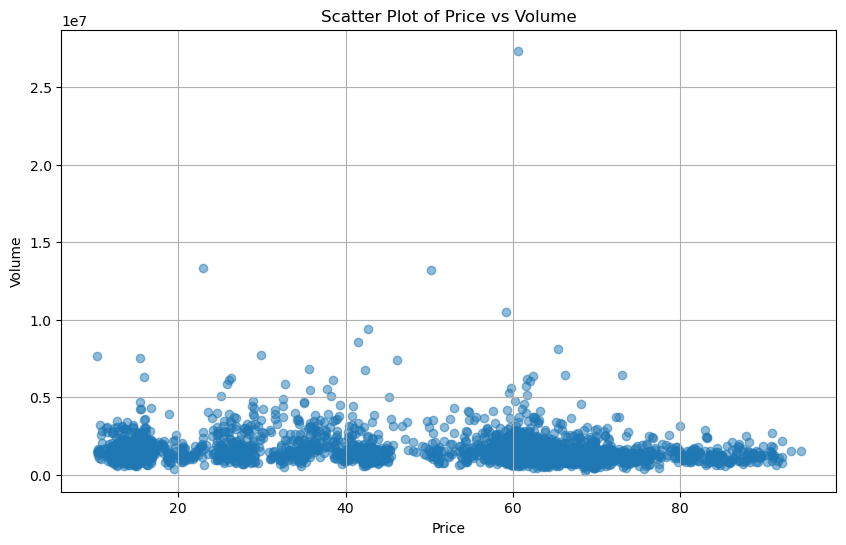

In [203]:
# Plotting scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['price'], df['volume'], alpha=0.5)
plt.title('Scatter Plot of Price vs Volume')
plt.xlabel('Price')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

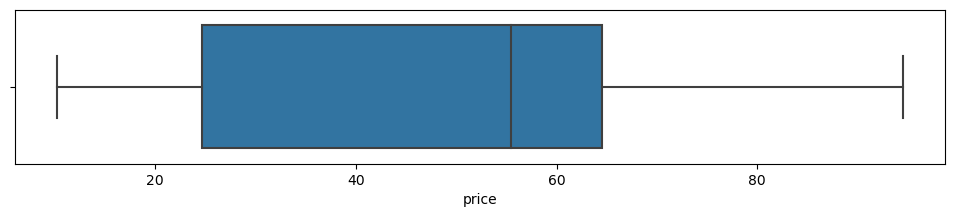

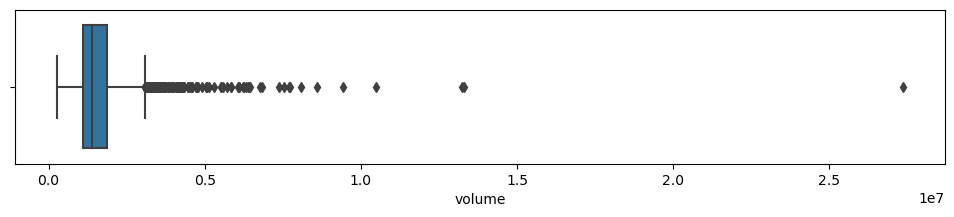

In [204]:
for col in df.columns:
    fig = plt.subplots(figsize=(12,2))
    ax = sns.boxplot(x=df[col], whis=1.5)
    
# Volumes has outliers

In [205]:
# Check stationarity for 'price' and 'volume'
adf_price = adfuller(df['price'])
adf_volume = adfuller(df['volume'])

# Print ADF test results
print("ADF test for 'price':")
print("ADF Statistic:", adf_price[0])
print("p-value:", adf_price[1])
print("Critical Values:", adf_price[4])
print("Is the 'price' stationary?", "No" if adf_price[1] > 0.05 else "Yes")
print("\nADF test for 'volume':")
print("ADF Statistic:", adf_volume[0])
print("p-value:", adf_volume[1])
print("Critical Values:", adf_volume[4])
print("Is the 'volume' stationary?", "No" if adf_volume[1] > 0.05 else "Yes")

ADF test for 'price':
ADF Statistic: -1.753651989559117
p-value: 0.4037026301966615
Critical Values: {'1%': -3.432962135264372, '5%': -2.862694028699462, '10%': -2.567384333962417}
Is the 'price' stationary? No

ADF test for 'volume':
ADF Statistic: -5.016375386585302
p-value: 2.0595269229817495e-05
Critical Values: {'1%': -3.4329799947351503, '5%': -2.862701915447137, '10%': -2.5673885329713495}
Is the 'volume' stationary? Yes


In [206]:
# appliying boxcox

boxcox_price, lambda_price = boxcox(df['price'])
boxcox_volume, lambda_volume = boxcox(df['volume'])

In [207]:
# Perform differencing
diff_price = diff(boxcox_price, k_diff=1)
diff_volume = diff(boxcox_volume, k_diff=1)

In [208]:
# Combine differenced 'price' and 'volume' into a single DataFrame
diff_data = pd.DataFrame({'price': diff_price, 'volume': diff_volume}, index=df.index[1:])

In [209]:
# Check stationarity for 'price' and 'volume'
adf_price = adfuller(diff_data['price'])
adf_volume = adfuller(diff_data['volume'])

# Print ADF test results
print("ADF test for 'price':")
print("ADF Statistic:", adf_price[0])
print("p-value:", adf_price[1])
print("Critical Values:", adf_price[4])
print("Is the 'price' stationary?", "No" if adf_price[1] > 0.05 else "Yes")
print("\nADF test for 'volume':")
print("ADF Statistic:", adf_volume[0])
print("p-value:", adf_volume[1])
print("Critical Values:", adf_volume[4])
print("Is the 'volume' stationary?", "No" if adf_volume[1] > 0.05 else "Yes")

ADF test for 'price':
ADF Statistic: -14.345375126590024
p-value: 1.0431554765061526e-26
Critical Values: {'1%': -3.432962135264372, '5%': -2.862694028699462, '10%': -2.567384333962417}
Is the 'price' stationary? Yes

ADF test for 'volume':
ADF Statistic: -15.047140993037326
p-value: 9.408526589332177e-28
Critical Values: {'1%': -3.4329799947351503, '5%': -2.862701915447137, '10%': -2.5673885329713495}
Is the 'volume' stationary? Yes


In [210]:
# Split the transformed data into training and testing sets
train_size = int(len(diff_data) * 0.97)
train_data, test_data = diff_data[:train_size], diff_data[train_size:]

In [211]:
# Find the optimum lag order using AIC
best_aic = np.inf
best_order = None
for p in range(1, 50):  # You can adjust the range of lag orders
    model = VAR(train_data)
    results = model.fit(p)
    aic = results.aic
    if aic < best_aic:
        best_aic = aic
        best_order = p

print("Best lag order:", best_order)

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsm

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsm

Best lag order: 12


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsm

In [212]:
# Train the VAR model on the differenced data
model = VAR(train_data)
results = model.fit(best_order)

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [213]:
# Forecast using the VAR model
forecast = results.forecast(train_data.values[-best_order:], steps=len(test_data))

In [214]:
# Inverse the Box-Cox transformation and differencing to obtain forecasted values
forecast_inverse_price = forecast[:, 0].cumsum() + boxcox_price[:train_size+1][-1]
forecast_inverse_volume = forecast[:, 1].cumsum() + boxcox_volume[:train_size+1][-1]

In [215]:
# Inverse Box-Cox transformation
forecast_inverse_price = inv_boxcox(forecast_inverse_price, lambda_price)
forecast_inverse_volume = inv_boxcox(forecast_inverse_volume, lambda_volume)

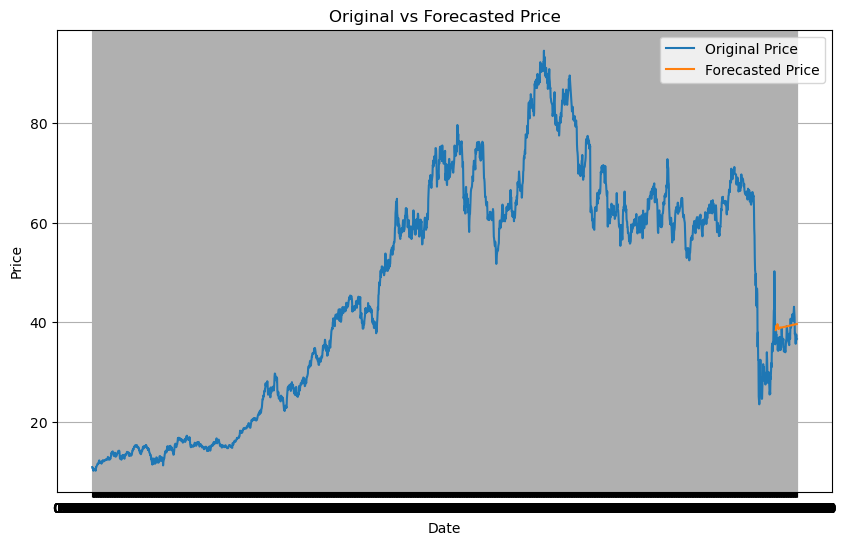

In [216]:
# Plot original price for all period
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['price'], label='Original Price')

# Plot forecasted price for test period only
test_index = df.index[train_size+1:]  # Adjust index to match differencing
plt.plot(test_index, forecast_inverse_price[:len(test_index)], label='Forecasted Price')

plt.title('Original vs Forecasted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [217]:
# Calculate MAPE
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Assuming df is your DataFrame with 'price' column and forecast_inverse_price is the forecasted prices
y_true = df['price'][train_size+1:]  # Original prices for the test period
y_pred = forecast_inverse_price[:len(y_true)]  # Forecasted prices for the test period

mape_value = mape(y_true, y_pred)
rmse_value = rmse(y_true, y_pred)

print("Mean Absolute Percentage Error (MAPE): {:.2f}%".format(mape_value))
print("Root Mean Squared Error (RMSE): {:.2f}".format(rmse_value))

Mean Absolute Percentage Error (MAPE): 6.92%
Root Mean Squared Error (RMSE): 2.83


## Model for Johnson & Johnson

In [218]:
df = JNJ_data.copy()

In [219]:
df.head()

Date       Open       High        Low      Close  Adj Close  \
0  01-10-2010  62.090000  62.250000  61.570000  61.750000  45.970119   
1  04-10-2010  61.540001  61.980000  61.299999  61.669998  45.910553   
2  05-10-2010  62.080002  62.939999  62.009998  62.799999  46.751797   
3  06-10-2010  62.889999  63.259998  62.500000  63.209999  47.057022   
4  07-10-2010  63.290001  63.500000  63.000000  63.220001  47.064480   

       Volume  
0   9773200.0  
1   8703600.0  
2  12439400.0  
3  11339800.0  
4   9826600.0

In [220]:
df.set_index('Date',inplace=True)

In [221]:
df = df[['Adj Close','Volume']]

In [222]:
df.rename(columns={'Adj Close': 'price', 'Volume': 'volume'}, inplace=True)

In [223]:
df.head()

price      volume
Date                             
01-10-2010  45.970119   9773200.0
04-10-2010  45.910553   8703600.0
05-10-2010  46.751797  12439400.0
06-10-2010  47.057022  11339800.0
07-10-2010  47.064480   9826600.0

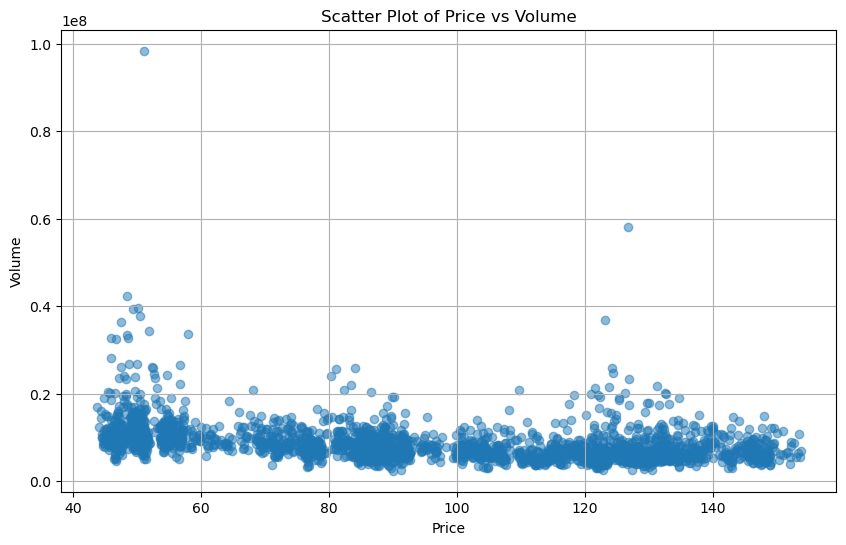

In [224]:
# Plotting scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['price'], df['volume'], alpha=0.5)
plt.title('Scatter Plot of Price vs Volume')
plt.xlabel('Price')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

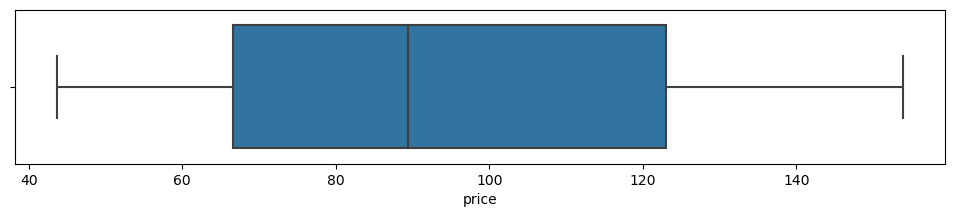

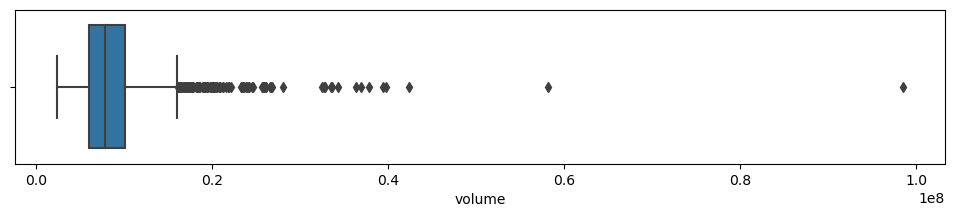

In [225]:
for col in df.columns:
    fig = plt.subplots(figsize=(12,2))
    ax = sns.boxplot(x=df[col], whis=1.5)
    
# Volumes has outliers

In [226]:
# Check stationarity for 'price' and 'volume'
adf_price = adfuller(df['price'])
adf_volume = adfuller(df['volume'])

# Print ADF test results
print("ADF test for 'price':")
print("ADF Statistic:", adf_price[0])
print("p-value:", adf_price[1])
print("Critical Values:", adf_price[4])
print("Is the 'price' stationary?", "No" if adf_price[1] > 0.05 else "Yes")
print("\nADF test for 'volume':")
print("ADF Statistic:", adf_volume[0])
print("p-value:", adf_volume[1])
print("Critical Values:", adf_volume[4])
print("Is the 'volume' stationary?", "No" if adf_volume[1] > 0.05 else "Yes")

ADF test for 'price':
ADF Statistic: -0.33743926720725853
p-value: 0.9200318888885299
Critical Values: {'1%': -3.4329778809556224, '5%': -2.86270098200392, '10%': -2.5673880359934063}
Is the 'price' stationary? No

ADF test for 'volume':
ADF Statistic: -5.3652749386736165
p-value: 4.005006635920632e-06
Critical Values: {'1%': -3.4329736635735393, '5%': -2.8626991196096556, '10%': -2.5673870444295406}
Is the 'volume' stationary? Yes


In [227]:
# appliying boxcox

boxcox_price, lambda_price = boxcox(df['price'])
boxcox_volume, lambda_volume = boxcox(df['volume'])

In [228]:
# Perform differencing
diff_price = diff(boxcox_price, k_diff=1)
diff_volume = diff(boxcox_volume, k_diff=1)

In [229]:
# Combine differenced 'price' and 'volume' into a single DataFrame
diff_data = pd.DataFrame({'price': diff_price, 'volume': diff_volume}, index=df.index[1:])

In [230]:
# Check stationarity for 'price' and 'volume'
adf_price = adfuller(diff_data['price'])
adf_volume = adfuller(diff_data['volume'])

# Print ADF test results
print("ADF test for 'price':")
print("ADF Statistic:", adf_price[0])
print("p-value:", adf_price[1])
print("Critical Values:", adf_price[4])
print("Is the 'price' stationary?", "No" if adf_price[1] > 0.05 else "Yes")
print("\nADF test for 'volume':")
print("ADF Statistic:", adf_volume[0])
print("p-value:", adf_volume[1])
print("Critical Values:", adf_volume[4])
print("Is the 'volume' stationary?", "No" if adf_volume[1] > 0.05 else "Yes")

ADF test for 'price':
ADF Statistic: -14.745131096604966
p-value: 2.5351001130201917e-27
Critical Values: {'1%': -3.4329652692893364, '5%': -2.8626954126892405, '10%': -2.567385070816339}
Is the 'price' stationary? Yes

ADF test for 'volume':
ADF Statistic: -14.696993382857698
p-value: 2.9875603350544944e-27
Critical Values: {'1%': -3.4329799947351503, '5%': -2.862701915447137, '10%': -2.5673885329713495}
Is the 'volume' stationary? Yes


In [231]:
# Split the transformed data into training and testing sets
train_size = int(len(diff_data) * 0.8)
train_data, test_data = diff_data[:train_size], diff_data[train_size:]

In [232]:
# Find the optimum lag order using AIC
best_aic = np.inf
best_order = None
for p in range(1, 50):  # You can adjust the range of lag orders
    model = VAR(train_data)
    results = model.fit(p)
    aic = results.aic
    if aic < best_aic:
        best_aic = aic
        best_order = p

print("Best lag order:", best_order)

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsm

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsm

Best lag order: 20


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsm

In [233]:
# Train the VAR model on the differenced data
model = VAR(train_data)
results = model.fit(best_order)

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [234]:
# Forecast using the VAR model
forecast = results.forecast(train_data.values[-best_order:], steps=len(test_data))

In [235]:
# Inverse the Box-Cox transformation and differencing to obtain forecasted values
forecast_inverse_price = forecast[:, 0].cumsum() + boxcox_price[:train_size+1][-1]
forecast_inverse_volume = forecast[:, 1].cumsum() + boxcox_volume[:train_size+1][-1]

In [236]:
# Inverse Box-Cox transformation
forecast_inverse_price = inv_boxcox(forecast_inverse_price, lambda_price)
forecast_inverse_volume = inv_boxcox(forecast_inverse_volume, lambda_volume)

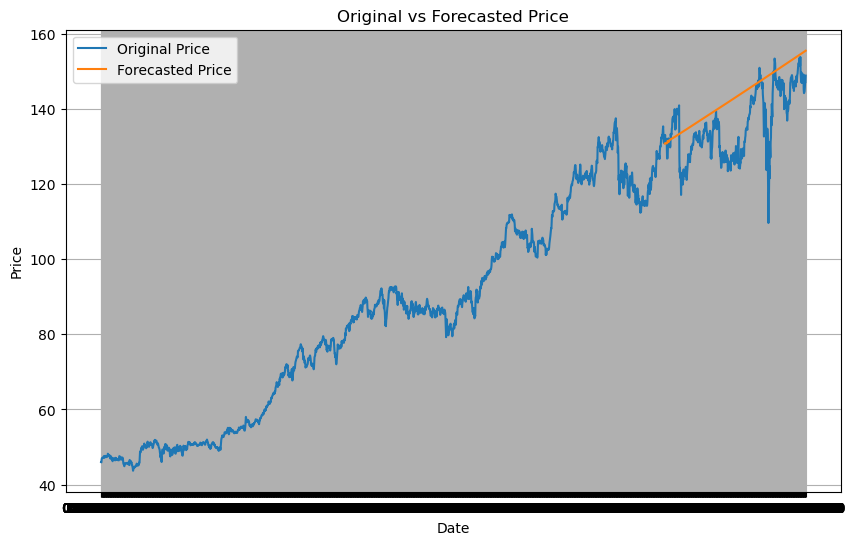

In [237]:
# Plot original price for all period
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['price'], label='Original Price')

# Plot forecasted price for test period only
test_index = df.index[train_size+1:]  # Adjust index to match differencing
plt.plot(test_index, forecast_inverse_price[:len(test_index)], label='Forecasted Price')

plt.title('Original vs Forecasted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [238]:
# Calculate MAPE
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Assuming df is your DataFrame with 'price' column and forecast_inverse_price is the forecasted prices
y_true = df['price'][train_size+1:]  # Original prices for the test period
y_pred = forecast_inverse_price[:len(y_true)]  # Forecasted prices for the test period

mape_value = mape(y_true, y_pred)
rmse_value = rmse(y_true, y_pred)

print("Mean Absolute Percentage Error (MAPE): {:.2f}%".format(mape_value))
print("Root Mean Squared Error (RMSE): {:.2f}".format(rmse_value))

Mean Absolute Percentage Error (MAPE): 6.22%
Root Mean Squared Error (RMSE): 10.05


## Model for Merck and CO inc.

In [239]:
df = MRK_data.copy()

In [240]:
df.head()

Date       Open       High        Low      Close  Adj Close  \
0  01-10-2010  36.759998  36.840000  36.349998  36.599998  26.052284   
1  04-10-2010  36.490002  36.750000  36.290001  36.520000  25.995331   
2  05-10-2010  36.860001  37.150002  36.700001  37.020000  26.351234   
3  06-10-2010  37.040001  37.220001  36.820000  37.009998  26.344130   
4  07-10-2010  37.349998  37.389999  36.630001  36.709999  26.130579   

       Volume  
0  11741900.0  
1   9234900.0  
2  10669200.0  
3   7541300.0  
4  13897800.0

In [241]:
df.set_index('Date',inplace=True)

In [242]:
df = df[['Adj Close','Volume']]

In [243]:
df.rename(columns={'Adj Close': 'price', 'Volume': 'volume'}, inplace=True)

In [244]:
df.head()

price      volume
Date                             
01-10-2010  26.052284  11741900.0
04-10-2010  25.995331   9234900.0
05-10-2010  26.351234  10669200.0
06-10-2010  26.344130   7541300.0
07-10-2010  26.130579  13897800.0

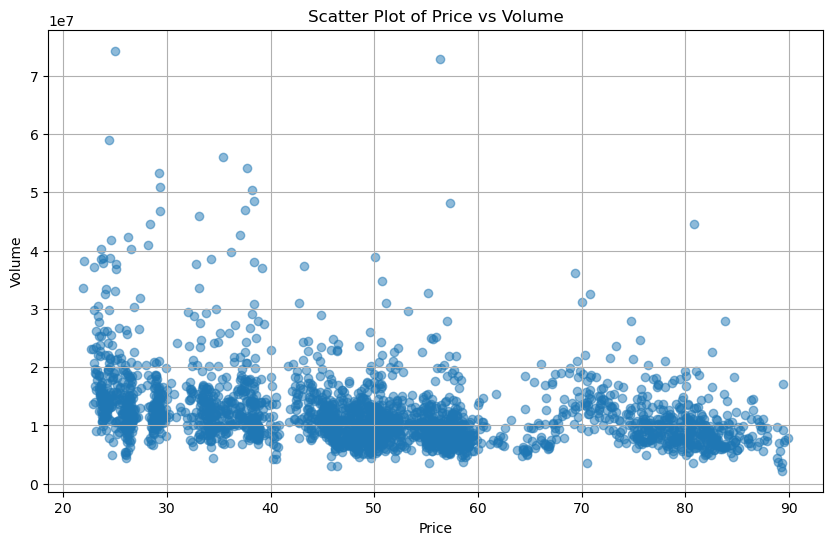

In [245]:
# Plotting scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['price'], df['volume'], alpha=0.5)
plt.title('Scatter Plot of Price vs Volume')
plt.xlabel('Price')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

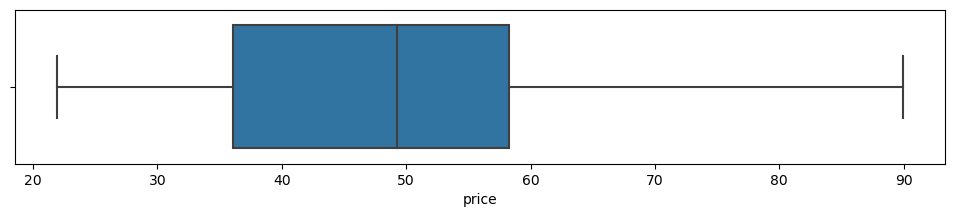

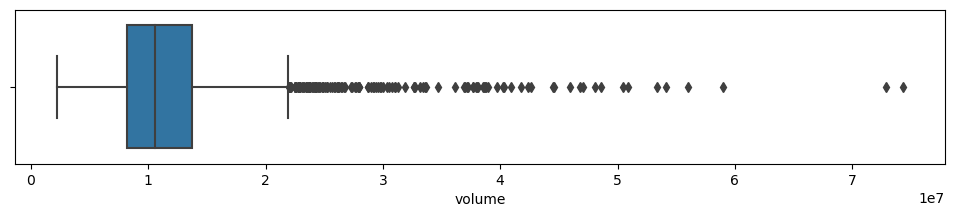

In [246]:
for col in df.columns:
    fig = plt.subplots(figsize=(12,2))
    ax = sns.boxplot(x=df[col], whis=1.5)
    
# Volumes has outliers

In [247]:
# Check stationarity for 'price' and 'volume'
adf_price = adfuller(df['price'])
adf_volume = adfuller(df['volume'])

# Print ADF test results
print("ADF test for 'price':")
print("ADF Statistic:", adf_price[0])
print("p-value:", adf_price[1])
print("Critical Values:", adf_price[4])
print("Is the 'price' stationary?", "No" if adf_price[1] > 0.05 else "Yes")
print("\nADF test for 'volume':")
print("ADF Statistic:", adf_volume[0])
print("p-value:", adf_volume[1])
print("Critical Values:", adf_volume[4])
print("Is the 'volume' stationary?", "No" if adf_volume[1] > 0.05 else "Yes")

ADF test for 'price':
ADF Statistic: -0.2530310840942003
p-value: 0.9318981335277218
Critical Values: {'1%': -3.4329673628206447, '5%': -2.862696337194766, '10%': -2.567385563035082}
Is the 'price' stationary? No

ADF test for 'volume':
ADF Statistic: -5.5619618677371285
p-value: 1.5346138841460404e-06
Critical Values: {'1%': -3.4329778809556224, '5%': -2.86270098200392, '10%': -2.5673880359934063}
Is the 'volume' stationary? Yes


In [248]:
# appliying boxcox

boxcox_price, lambda_price = boxcox(df['price'])
boxcox_volume, lambda_volume = boxcox(df['volume'])

In [249]:
# Perform differencing
diff_price = diff(boxcox_price, k_diff=1)
diff_volume = diff(boxcox_volume, k_diff=1)

In [250]:
# Combine differenced 'price' and 'volume' into a single DataFrame
diff_data = pd.DataFrame({'price': diff_price, 'volume': diff_volume}, index=df.index[1:])

In [251]:
# Check stationarity for 'price' and 'volume'
adf_price = adfuller(diff_data['price'])
adf_volume = adfuller(diff_data['volume'])

# Print ADF test results
print("ADF test for 'price':")
print("ADF Statistic:", adf_price[0])
print("p-value:", adf_price[1])
print("Critical Values:", adf_price[4])
print("Is the 'price' stationary?", "No" if adf_price[1] > 0.05 else "Yes")
print("\nADF test for 'volume':")
print("ADF Statistic:", adf_volume[0])
print("p-value:", adf_volume[1])
print("Critical Values:", adf_volume[4])
print("Is the 'volume' stationary?", "No" if adf_volume[1] > 0.05 else "Yes")

ADF test for 'price':
ADF Statistic: -13.325987447240387
p-value: 6.32015774696095e-25
Critical Values: {'1%': -3.4329684108437117, '5%': -2.8626968000025603, '10%': -2.56738580944}
Is the 'price' stationary? Yes

ADF test for 'volume':
ADF Statistic: -15.039460344297263
p-value: 9.640560534531455e-28
Critical Values: {'1%': -3.4329810529006184, '5%': -2.862702382731847, '10%': -2.5673887817601657}
Is the 'volume' stationary? Yes


In [252]:
# Split the transformed data into training and testing sets
train_size = int(len(diff_data) * 0.8)
train_data, test_data = diff_data[:train_size], diff_data[train_size:]

In [253]:
# Find the optimum lag order using AIC
best_aic = np.inf
best_order = None
for p in range(1, 50):  # You can adjust the range of lag orders
    model = VAR(train_data)
    results = model.fit(p)
    aic = results.aic
    if aic < best_aic:
        best_aic = aic
        best_order = p

print("Best lag order:", best_order)

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsm

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsm

Best lag order: 21


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsm

In [254]:
# Train the VAR model on the differenced data
model = VAR(train_data)
results = model.fit(best_order)

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [255]:
# Forecast using the VAR model
forecast = results.forecast(train_data.values[-best_order:], steps=len(test_data))

In [256]:
# Inverse the Box-Cox transformation and differencing to obtain forecasted values
forecast_inverse_price = forecast[:, 0].cumsum() + boxcox_price[:train_size+1][-1]
forecast_inverse_volume = forecast[:, 1].cumsum() + boxcox_volume[:train_size+1][-1]

In [257]:
# Inverse Box-Cox transformation
forecast_inverse_price = inv_boxcox(forecast_inverse_price, lambda_price)
forecast_inverse_volume = inv_boxcox(forecast_inverse_volume, lambda_volume)

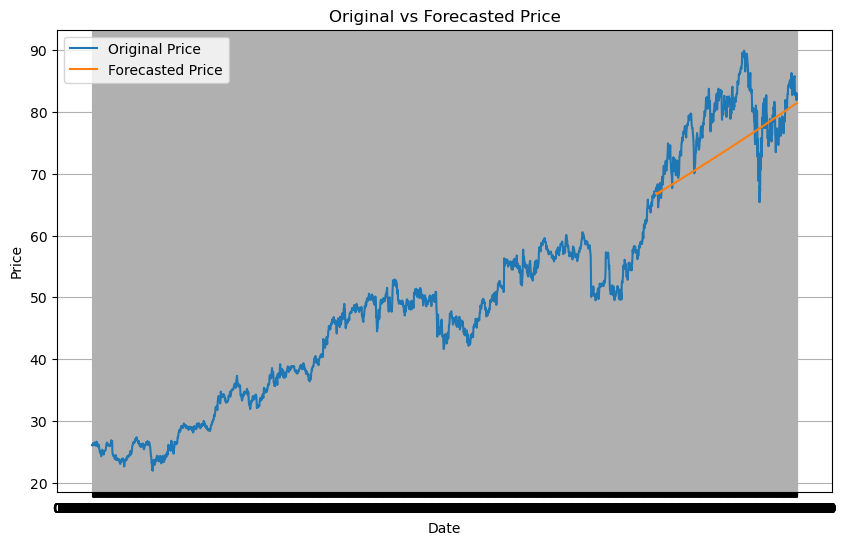

In [258]:
# Plot original price for all period
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['price'], label='Original Price')

# Plot forecasted price for test period only
test_index = df.index[train_size+1:]  # Adjust index to match differencing
plt.plot(test_index, forecast_inverse_price[:len(test_index)], label='Forecasted Price')

plt.title('Original vs Forecasted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [259]:
# Calculate MAPE
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Assuming df is your DataFrame with 'price' column and forecast_inverse_price is the forecasted prices
y_true = df['price'][train_size+1:]  # Original prices for the test period
y_pred = forecast_inverse_price[:len(y_true)]  # Forecasted prices for the test period

mape_value = mape(y_true, y_pred)
rmse_value = rmse(y_true, y_pred)

print("Mean Absolute Percentage Error (MAPE): {:.2f}%".format(mape_value))
print("Root Mean Squared Error (RMSE): {:.2f}".format(rmse_value))

Mean Absolute Percentage Error (MAPE): 6.67%
Root Mean Squared Error (RMSE): 6.36


## Model for Apple Inc

In [260]:
df = AAPL_data.copy()

In [261]:
df.head()

Date       Open       High        Low      Close  Adj Close  \
0  01-10-2010  10.219643  10.235000  10.048214  10.090000   8.719163   
1  04-10-2010  10.057143  10.103572   9.920357   9.951428   8.599421   
2  05-10-2010  10.071428  10.337500  10.065000  10.319285   8.917298   
3  06-10-2010  10.342500  10.428214  10.187857  10.328215   8.925013   
4  07-10-2010  10.369286  10.374286  10.246786  10.329286   8.925941   

      Volume  
0  448142800  
1  435302000  
2  501967200  
3  670868800  
4  408399600

In [262]:
df.set_index('Date',inplace=True)

In [263]:
df = df[['Adj Close','Volume']]

In [264]:
df.rename(columns={'Adj Close': 'price', 'Volume': 'volume'}, inplace=True)

In [265]:
df.head()

price     volume
Date                           
01-10-2010  8.719163  448142800
04-10-2010  8.599421  435302000
05-10-2010  8.917298  501967200
06-10-2010  8.925013  670868800
07-10-2010  8.925941  408399600

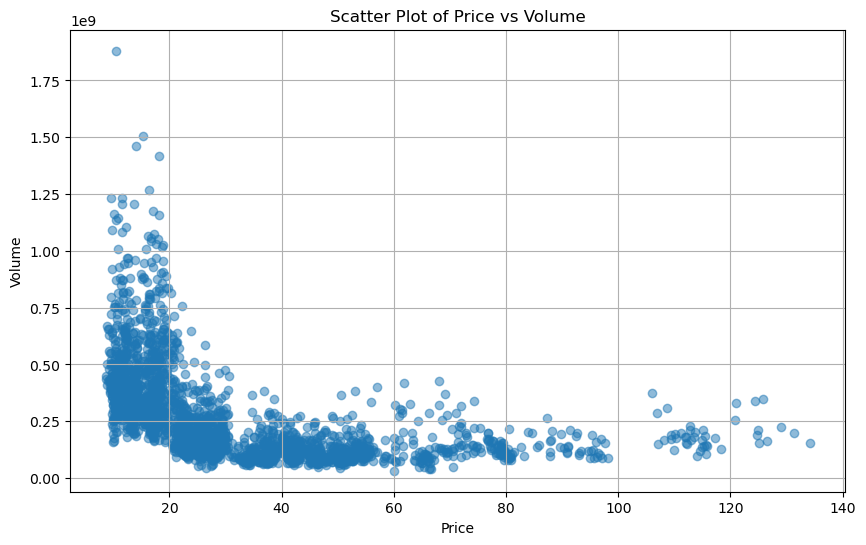

In [266]:
# Plotting scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['price'], df['volume'], alpha=0.5)
plt.title('Scatter Plot of Price vs Volume')
plt.xlabel('Price')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

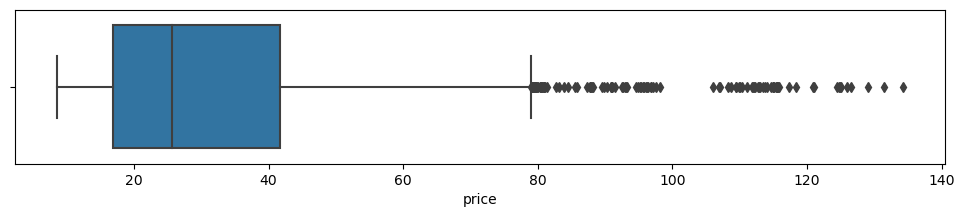

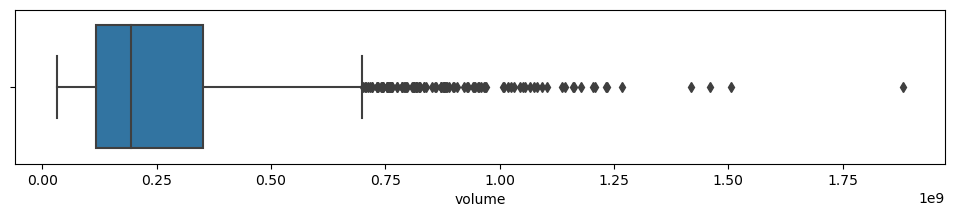

In [267]:
for col in df.columns:
    fig = plt.subplots(figsize=(12,2))
    ax = sns.boxplot(x=df[col], whis=1.5)
    
# Volumes has outliers

In [268]:
# Check stationarity for 'price' and 'volume'
adf_price = adfuller(df['price'])
adf_volume = adfuller(df['volume'])

# Print ADF test results
print("ADF test for 'price':")
print("ADF Statistic:", adf_price[0])
print("p-value:", adf_price[1])
print("Critical Values:", adf_price[4])
print("Is the 'price' stationary?", "No" if adf_price[1] > 0.05 else "Yes")
print("\nADF test for 'volume':")
print("ADF Statistic:", adf_volume[0])
print("p-value:", adf_volume[1])
print("Critical Values:", adf_volume[4])
print("Is the 'volume' stationary?", "No" if adf_volume[1] > 0.05 else "Yes")

ADF test for 'price':
ADF Statistic: 2.940155076152287
p-value: 1.0
Critical Values: {'1%': -3.4329799947351503, '5%': -2.862701915447137, '10%': -2.5673885329713495}
Is the 'price' stationary? No

ADF test for 'volume':
ADF Statistic: -2.747477352945843
p-value: 0.06617672362947394
Critical Values: {'1%': -3.4329778809556224, '5%': -2.86270098200392, '10%': -2.5673880359934063}
Is the 'volume' stationary? No


In [269]:
# appliying boxcox


boxcox_price, lambda_price = boxcox(df['price'])
boxcox_volume, lambda_volume = boxcox(df['volume'])

In [270]:
# Perform differencing
diff_price = diff(boxcox_price, k_diff=1)
diff_volume = diff(boxcox_volume, k_diff=1)

In [271]:
# Combine differenced 'price' and 'volume' into a single DataFrame
diff_data = pd.DataFrame({'price': diff_price, 'volume': diff_volume}, index=df.index[1:])

In [272]:
# Check stationarity for 'price' and 'volume'
adf_price = adfuller(diff_data['price'])
adf_volume = adfuller(diff_data['volume'])

# Print ADF test results
print("ADF test for 'price':")
print("ADF Statistic:", adf_price[0])
print("p-value:", adf_price[1])
print("Critical Values:", adf_price[4])
print("Is the 'price' stationary?", "No" if adf_price[1] > 0.05 else "Yes")
print("\nADF test for 'volume':")
print("ADF Statistic:", adf_volume[0])
print("p-value:", adf_volume[1])
print("Critical Values:", adf_volume[4])
print("Is the 'volume' stationary?", "No" if adf_volume[1] > 0.05 else "Yes")

ADF test for 'price':
ADF Statistic: -10.141781202867755
p-value: 8.383647937526897e-18
Critical Values: {'1%': -3.4329747166494915, '5%': -2.862699584647827, '10%': -2.567387292022104}
Is the 'price' stationary? Yes

ADF test for 'volume':
ADF Statistic: -15.3824155544048
p-value: 3.3937009565808485e-28
Critical Values: {'1%': -3.4329810529006184, '5%': -2.862702382731847, '10%': -2.5673887817601657}
Is the 'volume' stationary? Yes


In [273]:
# Split the transformed data into training and testing sets
train_size = int(len(diff_data) * 0.8)
train_data, test_data = diff_data[:train_size], diff_data[train_size:]

In [274]:
# Find the optimum lag order using AIC
best_aic = np.inf
best_order = None
for p in range(1, 50):  # You can adjust the range of lag orders
    model = VAR(train_data)
    results = model.fit(p)
    aic = results.aic
    if aic < best_aic:
        best_aic = aic
        best_order = p

print("Best lag order:", best_order)

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsm

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsm

Best lag order: 12


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [275]:
# Train the VAR model on the differenced data
model = VAR(train_data)
results = model.fit(best_order)

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [276]:
# Forecast using the VAR model
forecast = results.forecast(train_data.values[-best_order:], steps=len(test_data))

In [277]:
# Inverse the Box-Cox transformation and differencing to obtain forecasted values
forecast_inverse_price = forecast[:, 0].cumsum() + boxcox_price[:train_size+1][-1]
forecast_inverse_volume = forecast[:, 1].cumsum() + boxcox_volume[:train_size+1][-1]

In [278]:
# Inverse Box-Cox transformation
forecast_inverse_price = inv_boxcox(forecast_inverse_price, lambda_price)
forecast_inverse_volume = inv_boxcox(forecast_inverse_volume, lambda_volume)

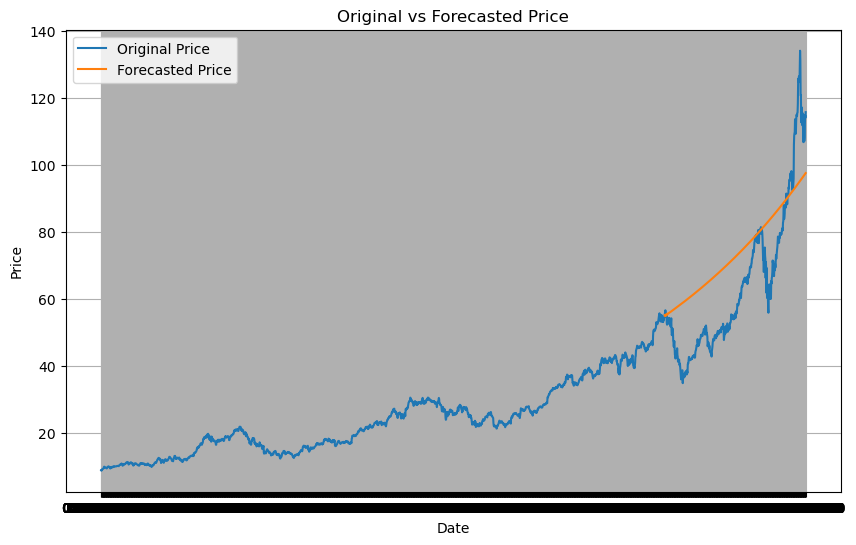

In [279]:
# Plot original price for all period
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['price'], label='Original Price')

# Plot forecasted price for test period only
test_index = df.index[train_size+1:]  # Adjust index to match differencing
plt.plot(test_index, forecast_inverse_price[:len(test_index)], label='Forecasted Price')

plt.title('Original vs Forecasted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [280]:
# Calculate MAPE
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Assuming df is your DataFrame with 'price' column and forecast_inverse_price is the forecasted prices
y_true = df['price'][train_size+1:]  # Original prices for the test period
y_pred = forecast_inverse_price[:len(y_true)]  # Forecasted prices for the test period

mape_value = mape(y_true, y_pred)
rmse_value = rmse(y_true, y_pred)

print("Mean Absolute Percentage Error (MAPE): {:.2f}%".format(mape_value))
print("Root Mean Squared Error (RMSE): {:.2f}".format(rmse_value))

Mean Absolute Percentage Error (MAPE): 24.60%
Root Mean Squared Error (RMSE): 15.32


## Model for Amazon

In [281]:
df = AMZN_data.copy()

In [282]:
df.head()

Date        Open        High         Low       Close   Adj Close  \
0  01-10-2010  157.080002  157.440002  152.199997  153.710007  153.710007   
1  04-10-2010  153.949997  155.960007  152.789993  155.389999  155.389999   
2  05-10-2010  157.080002  161.210007  157.009995  160.869995  160.869995   
3  06-10-2010  160.600006  160.679993  154.600006  155.399994  155.399994   
4  07-10-2010  156.509995  157.399994  153.389999  156.270004  156.270004   

      Volume  
0  8683400.0  
1  5346500.0  
2  5620000.0  
3  6060800.0  
4  4622000.0

In [283]:
df.set_index('Date',inplace=True)

In [284]:
df = df[['Adj Close','Volume']]

In [285]:
df.rename(columns={'Adj Close': 'price', 'Volume': 'volume'}, inplace=True)

In [286]:
df.head()

price     volume
Date                             
01-10-2010  153.710007  8683400.0
04-10-2010  155.389999  5346500.0
05-10-2010  160.869995  5620000.0
06-10-2010  155.399994  6060800.0
07-10-2010  156.270004  4622000.0

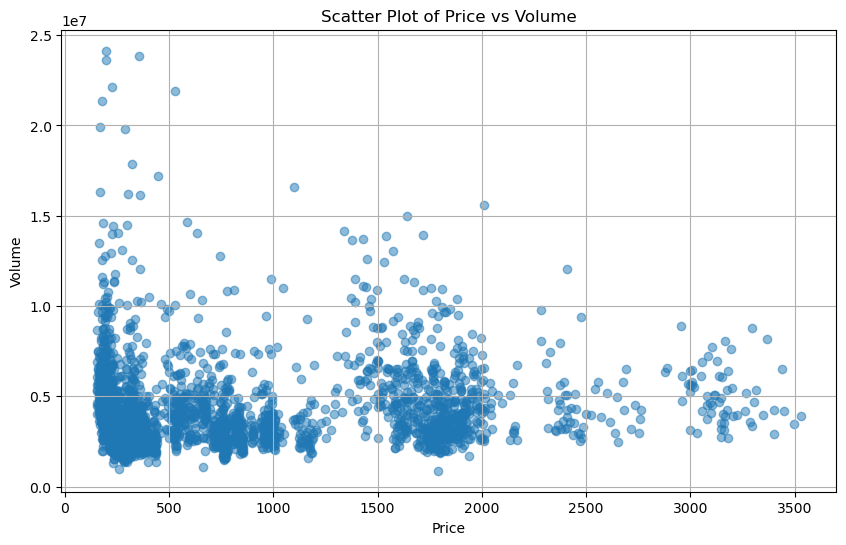

In [287]:
# Plotting scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['price'], df['volume'], alpha=0.5)
plt.title('Scatter Plot of Price vs Volume')
plt.xlabel('Price')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

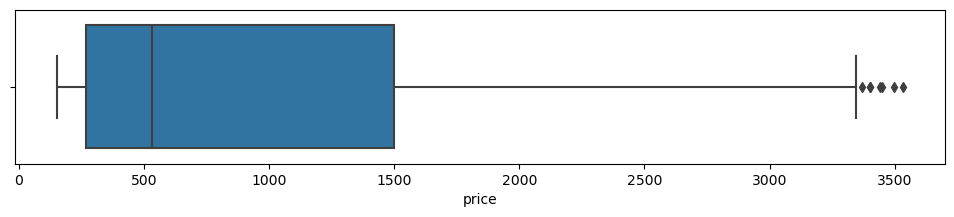

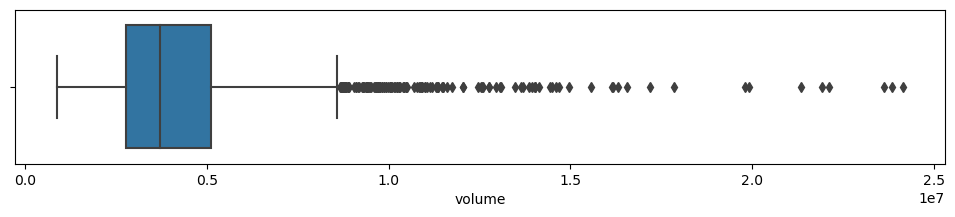

In [288]:
for col in df.columns:
    fig = plt.subplots(figsize=(12,2))
    ax = sns.boxplot(x=df[col], whis=1.5)
    
# Volumes has outliers

In [289]:
# Check stationarity for 'price' and 'volume'
adf_price = adfuller(df['price'])
adf_volume = adfuller(df['volume'])

# Print ADF test results
print("ADF test for 'price':")
print("ADF Statistic:", adf_price[0])
print("p-value:", adf_price[1])
print("Critical Values:", adf_price[4])
print("Is the 'price' stationary?", "No" if adf_price[1] > 0.05 else "Yes")
print("\nADF test for 'volume':")
print("ADF Statistic:", adf_volume[0])
print("p-value:", adf_volume[1])
print("Critical Values:", adf_volume[4])
print("Is the 'volume' stationary?", "No" if adf_volume[1] > 0.05 else "Yes")

ADF test for 'price':
ADF Statistic: 2.739671031930698
p-value: 0.9990880799540094
Critical Values: {'1%': -3.4329799947351503, '5%': -2.862701915447137, '10%': -2.5673885329713495}
Is the 'price' stationary? No

ADF test for 'volume':
ADF Statistic: -8.224824563794984
p-value: 6.287422461274982e-13
Critical Values: {'1%': -3.4329642237790847, '5%': -2.862694950990622, '10%': -2.5673848250020415}
Is the 'volume' stationary? Yes


In [290]:
# appliying boxcox

boxcox_price, lambda_price = boxcox(df['price'])
boxcox_volume, lambda_volume = boxcox(df['volume'])

In [291]:
# Perform differencing
diff_price = diff(boxcox_price, k_diff=1)
diff_volume = diff(boxcox_volume, k_diff=1)

In [292]:
# Combine differenced 'price' and 'volume' into a single DataFrame
diff_data = pd.DataFrame({'price': diff_price, 'volume': diff_volume}, index=df.index[1:])

In [293]:
# Check stationarity for 'price' and 'volume'
adf_price = adfuller(diff_data['price'])
adf_volume = adfuller(diff_data['volume'])

# Print ADF test results
print("ADF test for 'price':")
print("ADF Statistic:", adf_price[0])
print("p-value:", adf_price[1])
print("Critical Values:", adf_price[4])
print("Is the 'price' stationary?", "No" if adf_price[1] > 0.05 else "Yes")
print("\nADF test for 'volume':")
print("ADF Statistic:", adf_volume[0])
print("p-value:", adf_volume[1])
print("Critical Values:", adf_volume[4])
print("Is the 'volume' stationary?", "No" if adf_volume[1] > 0.05 else "Yes")

ADF test for 'price':
ADF Statistic: -51.0904359570958
p-value: 0.0
Critical Values: {'1%': -3.4329527780962255, '5%': -2.8626898965523724, '10%': -2.567382133955709}
Is the 'price' stationary? Yes

ADF test for 'volume':
ADF Statistic: -14.524109749300159
p-value: 5.4638627043693866e-27
Critical Values: {'1%': -3.4329810529006184, '5%': -2.862702382731847, '10%': -2.5673887817601657}
Is the 'volume' stationary? Yes


In [294]:
# Plotting
# plt.figure(figsize=(10, 6))
# plt.plot(diff_data.index, diff_data['price'], color='blue', linestyle='-')
# plt.title('Price Trend Over Time')
# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.grid(True)
# plt.show()

In [295]:
# Split the transformed data into training and testing sets
train_size = int(len(diff_data) * 0.9)
train_data, test_data = diff_data[:train_size], diff_data[train_size:]

In [296]:
# Find the optimum lag order using AIC
best_aic = np.inf
best_order = None
for p in range(1, 50):  # You can adjust the range of lag orders
    model = VAR(train_data)
    results = model.fit(p)
    aic = results.aic
    if aic < best_aic:
        best_aic = aic
        best_order = p

print("Best lag order:", best_order)

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsm

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsm

Best lag order: 12


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsm

In [297]:
# Train the VAR model on the differenced data
model = VAR(train_data)
results = model.fit(best_order)

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [298]:
# Forecast using the VAR model
forecast = results.forecast(train_data.values[-best_order:], steps=len(test_data))

In [299]:
# Inverse the Box-Cox transformation and differencing to obtain forecasted values
forecast_inverse_price = forecast[:, 0].cumsum() + boxcox_price[:train_size+1][-1]
forecast_inverse_volume = forecast[:, 1].cumsum() + boxcox_volume[:train_size+1][-1]

In [300]:
# Inverse Box-Cox transformation
forecast_inverse_price = inv_boxcox(forecast_inverse_price, lambda_price)
forecast_inverse_volume = inv_boxcox(forecast_inverse_volume, lambda_volume)

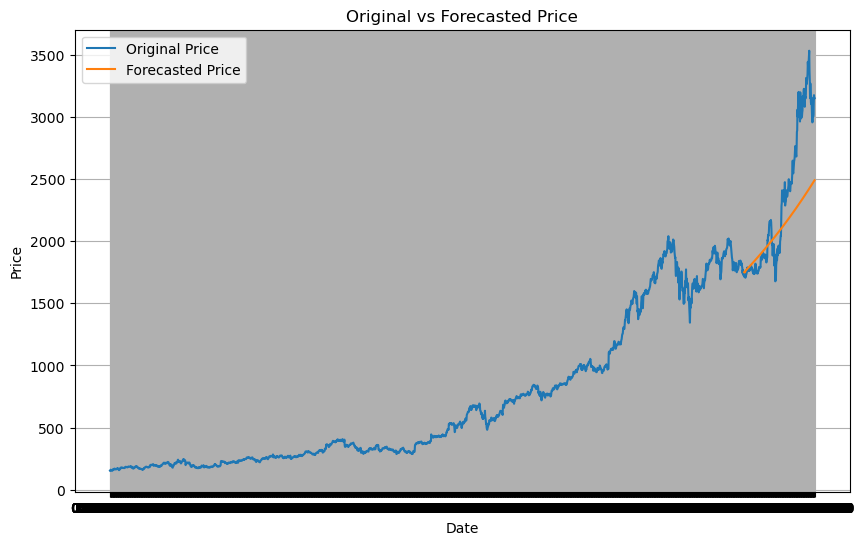

In [301]:
# Plot original price for all period
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['price'], label='Original Price')

# Plot forecasted price for test period only
test_index = df.index[train_size+1:]  # Adjust index to match differencing
plt.plot(test_index, forecast_inverse_price[:len(test_index)], label='Forecasted Price')

plt.title('Original vs Forecasted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [302]:
# Calculate MAPE
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Assuming df is your DataFrame with 'price' column and forecast_inverse_price is the forecasted prices
y_true = df['price'][train_size+1:]  # Original prices for the test period
y_pred = forecast_inverse_price[:len(y_true)]  # Forecasted prices for the test period

mape_value = mape(y_true, y_pred)
rmse_value = rmse(y_true, y_pred)

print("Mean Absolute Percentage Error (MAPE): {:.2f}%".format(mape_value))
print("Root Mean Squared Error (RMSE): {:.2f}".format(rmse_value))

Mean Absolute Percentage Error (MAPE): 11.18%
Root Mean Squared Error (RMSE): 428.23


## Model for Alphabet (Google)

In [303]:
df = GOOG_data.copy()

In [304]:
df.head()

Date        Open        High         Low       Close   Adj Close  \
0  01-10-2010  264.010437  264.319275  260.523499  261.828613  261.828613   
1  04-10-2010  261.494843  263.138702  258.456238  260.199707  260.199707   
2  05-10-2010  263.203461  268.991760  262.291870  268.110046  268.110046   
3  06-10-2010  268.623138  268.966858  263.980530  266.177307  266.177307   
4  07-10-2010  267.103821  267.596985  263.582031  264.015411  264.015411   

      Volume  
0  4466600.0  
1  3895400.0  
2  7040400.0  
3  5545200.0  
4  4809400.0

In [305]:
df.set_index('Date',inplace=True)

In [306]:
df = df[['Adj Close','Volume']]

In [307]:
df.rename(columns={'Adj Close': 'price', 'Volume': 'volume'}, inplace=True)

In [308]:
df.head()

price     volume
Date                             
01-10-2010  261.828613  4466600.0
04-10-2010  260.199707  3895400.0
05-10-2010  268.110046  7040400.0
06-10-2010  266.177307  5545200.0
07-10-2010  264.015411  4809400.0

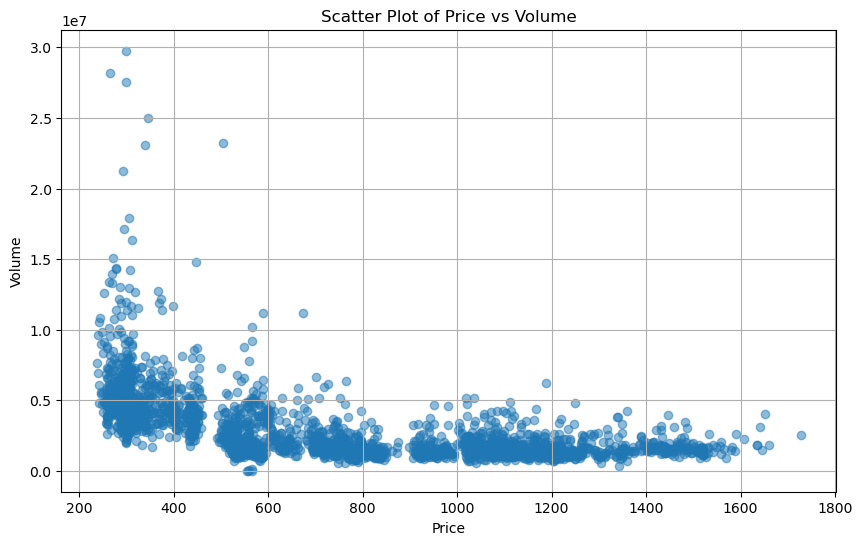

In [309]:
# Plotting scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['price'], df['volume'], alpha=0.5)
plt.title('Scatter Plot of Price vs Volume')
plt.xlabel('Price')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

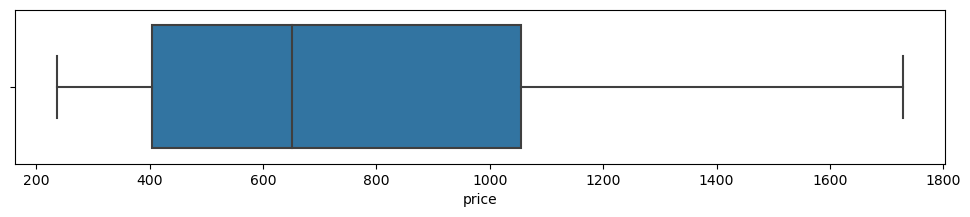

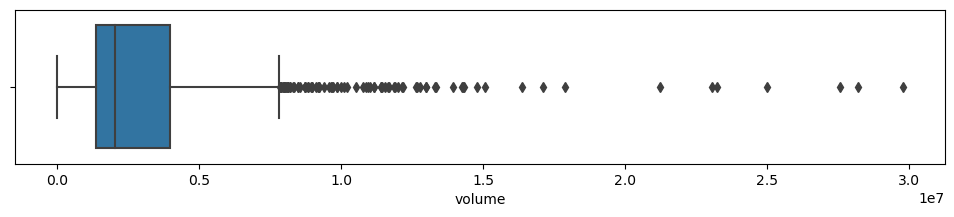

In [310]:
for col in df.columns:
    fig = plt.subplots(figsize=(12,2))
    ax = sns.boxplot(x=df[col], whis=1.5)
    
# Volumes has outliers

In [311]:
# Check stationarity for 'price' and 'volume'
adf_price = adfuller(df['price'])
adf_volume = adfuller(df['volume'])

# Print ADF test results
print("ADF test for 'price':")
print("ADF Statistic:", adf_price[0])
print("p-value:", adf_price[1])
print("Critical Values:", adf_price[4])
print("Is the 'price' stationary?", "No" if adf_price[1] > 0.05 else "Yes")
print("\nADF test for 'volume':")
print("ADF Statistic:", adf_volume[0])
print("p-value:", adf_volume[1])
print("Critical Values:", adf_volume[4])
print("Is the 'volume' stationary?", "No" if adf_volume[1] > 0.05 else "Yes")

ADF test for 'price':
ADF Statistic: 0.1883782071863659
p-value: 0.9716021780456466
Critical Values: {'1%': -3.4329747166494915, '5%': -2.862699584647827, '10%': -2.567387292022104}
Is the 'price' stationary? No

ADF test for 'volume':
ADF Statistic: -3.482047431840643
p-value: 0.008460303374381035
Critical Values: {'1%': -3.4329757705711432, '5%': -2.862700050059295, '10%': -2.567387539813443}
Is the 'volume' stationary? Yes


In [312]:
# appliying boxcox

boxcox_price, lambda_price = boxcox(df['price'])
boxcox_volume, lambda_volume = boxcox(df['volume'])

In [313]:
# Perform differencing
diff_price = diff(boxcox_price, k_diff=1)
diff_volume = diff(boxcox_volume, k_diff=1)

In [314]:
# Combine differenced 'price' and 'volume' into a single DataFrame
diff_data = pd.DataFrame({'price': diff_price, 'volume': diff_volume}, index=df.index[1:])

In [315]:
# Check stationarity for 'price' and 'volume'
adf_price = adfuller(diff_data['price'])
adf_volume = adfuller(diff_data['volume'])

# Print ADF test results
print("ADF test for 'price':")
print("ADF Statistic:", adf_price[0])
print("p-value:", adf_price[1])
print("Critical Values:", adf_price[4])
print("Is the 'price' stationary?", "No" if adf_price[1] > 0.05 else "Yes")
print("\nADF test for 'volume':")
print("ADF Statistic:", adf_volume[0])
print("p-value:", adf_volume[1])
print("Critical Values:", adf_volume[4])
print("Is the 'volume' stationary?", "No" if adf_volume[1] > 0.05 else "Yes")

ADF test for 'price':
ADF Statistic: -17.084541592526538
p-value: 7.665613275312398e-30
Critical Values: {'1%': -3.4329610922579095, '5%': -2.8626935681060375, '10%': -2.567384088736619}
Is the 'price' stationary? Yes

ADF test for 'volume':
ADF Statistic: -15.702709025659493
p-value: 1.3898351141616714e-28
Critical Values: {'1%': -3.4329810529006184, '5%': -2.862702382731847, '10%': -2.5673887817601657}
Is the 'volume' stationary? Yes


In [316]:
# Plotting
# plt.figure(figsize=(10, 6))
# plt.plot(diff_data.index, diff_data['price'], color='blue', linestyle='-')
# plt.title('Price Trend Over Time')
# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.grid(True)
# plt.show()

In [317]:
# Split the transformed data into training and testing sets
train_size = int(len(diff_data) * 0.8)
train_data, test_data = diff_data[:train_size], diff_data[train_size:]

In [318]:
# Find the optimum lag order using AIC
best_aic = np.inf
best_order = None
for p in range(1, 50):  # You can adjust the range of lag orders
    model = VAR(train_data)
    results = model.fit(p)
    aic = results.aic
    if aic < best_aic:
        best_aic = aic
        best_order = p

print("Best lag order:", best_order)

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsm

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsm

Best lag order: 21


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsm

In [319]:
# Train the VAR model on the differenced data
model = VAR(train_data)
results = model.fit(best_order)

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [320]:
# Forecast using the VAR model
forecast = results.forecast(train_data.values[-best_order:], steps=len(test_data))

In [321]:
# Inverse the Box-Cox transformation and differencing to obtain forecasted values
forecast_inverse_price = forecast[:, 0].cumsum() + boxcox_price[:train_size+1][-1]
forecast_inverse_volume = forecast[:, 1].cumsum() + boxcox_volume[:train_size+1][-1]

In [322]:
# Inverse Box-Cox transformation
forecast_inverse_price = inv_boxcox(forecast_inverse_price, lambda_price)
forecast_inverse_volume = inv_boxcox(forecast_inverse_volume, lambda_volume)

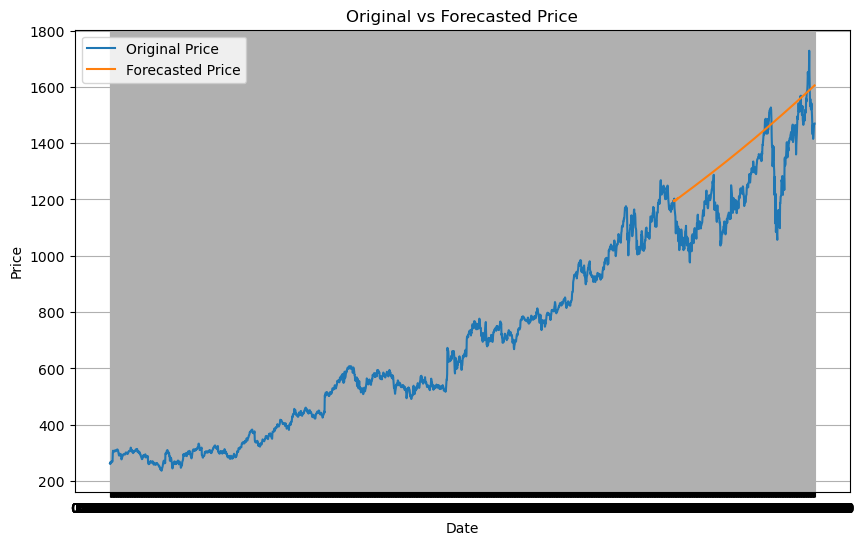

In [323]:
# Plot original price for all period
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['price'], label='Original Price')

# Plot forecasted price for test period only
test_index = df.index[train_size+1:]  # Adjust index to match differencing
plt.plot(test_index, forecast_inverse_price[:len(test_index)], label='Forecasted Price')

plt.title('Original vs Forecasted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [324]:
# Calculate MAPE
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Assuming df is your DataFrame with 'price' column and forecast_inverse_price is the forecasted prices
y_true = df['price'][train_size+1:]  # Original prices for the test period
y_pred = forecast_inverse_price[:len(y_true)]  # Forecasted prices for the test period

mape_value = mape(y_true, y_pred)
rmse_value = rmse(y_true, y_pred)

print("Mean Absolute Percentage Error (MAPE): {:.2f}%".format(mape_value))
print("Root Mean Squared Error (RMSE): {:.2f}".format(rmse_value))

Mean Absolute Percentage Error (MAPE): 11.65%
Root Mean Squared Error (RMSE): 158.56
